In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import matplotlib.dates as mdates  # For working with dates in matplotlib plots
import seaborn as sns  # For making statistical graphics in Python
import plotly.express as px  # For interactive data visualizations
from wordcloud import WordCloud  # For generating word clouds
from sklearn.feature_extraction.text import CountVectorizer  # For converting a collection of text documents to a matrix of token counts
import warnings  # For issuing warnings

# Suppress FutureWarnings to avoid clutter in the output
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = pd.read_pickle("crime_dataset.pkl")
data.head()

date_reported  date_of_occurrence  time_of_occurrence  \
report_number                                                               
1             2020-01-02 00:00:00 2020-01-01 00:00:00 2020-01-01 01:11:00   
2             2020-01-01 19:00:00 2020-01-01 01:00:00 2020-01-01 06:26:00   
3             2020-01-02 05:00:00 2020-01-01 02:00:00 2020-01-01 14:30:00   
4             2020-01-01 05:00:00 2020-01-01 03:00:00 2020-01-01 14:46:00   
5             2020-01-01 21:00:00 2020-01-01 04:00:00 2020-01-01 16:51:00   

                    city  crime_code crime_description  victim_age  \
report_number                                                        
1              Ahmedabad         576    IDENTITY THEFT          16   
2                Chennai         128          HOMICIDE          37   
3               Ludhiana         271        KIDNAPPING          48   
4                   Pune         170          BURGLARY          49   
5                   Pune         421         VANDALISM          30   

              victim_gender   weapon_used   crime_domain  police_deployed  \
report_number                                                               
1                         M  Blunt Object  Violent Crime               13   
2                         M        Poison    Other Crime                9   
3                         F  Blunt Object    Other Crime               15   
4                         F       Firearm    Other Crime                1   
5                         F         Other    Other Crime               18   

              case_closed    date_case_closed  
report_number                                  
1                      No 2050-01-01 00:00:00  
2                      No 2050-01-01 00:00:00  
3                      No 2050-01-01 00:00:00  
4                     Yes 2020-04-29 05:00:00  
5                     Yes 2020-01-08 21:00:00

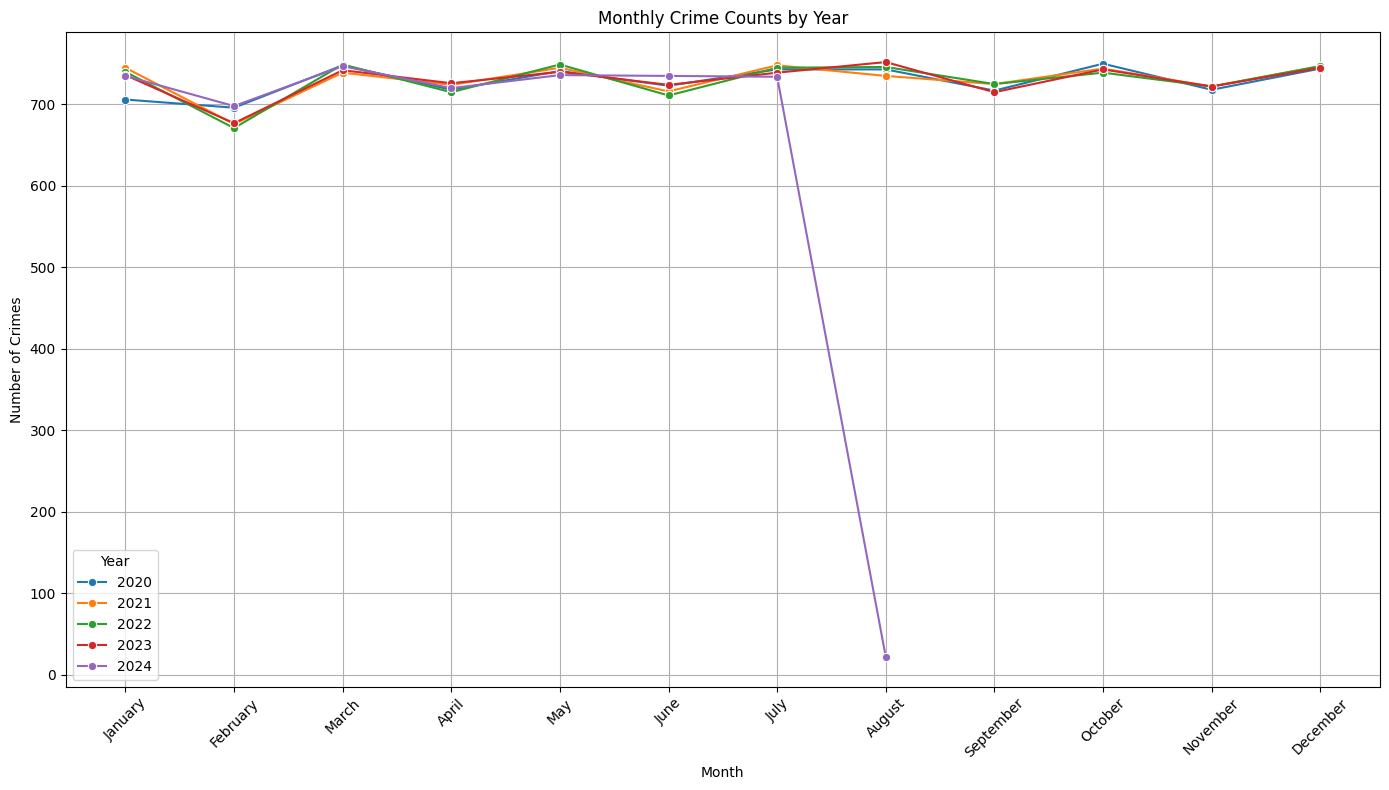

In [3]:
# Create a copy of the original dataset to avoid modifying the original data
data_copy = data.copy()

# Ensure 'date_reported' and 'date_of_occurrence' columns are in datetime format
data_copy['date_reported'] = pd.to_datetime(data_copy['date_reported'])
data_copy['date_of_occurrence'] = pd.to_datetime(data_copy['date_of_occurrence'])

# Extract features from 'date_reported'
data_copy['report_year'] = data_copy['date_reported'].dt.year
data_copy['report_month'] = data_copy['date_reported'].dt.month
data_copy['report_day'] = data_copy['date_reported'].dt.day
data_copy['report_day_of_week'] = data_copy['date_reported'].dt.day_name()
data_copy['report_hour'] = data_copy['date_reported'].dt.hour
data_copy['report_minute'] = data_copy['date_reported'].dt.minute

# Extract features from 'date_of_occurrence'
data_copy['occurrence_year'] = data_copy['date_of_occurrence'].dt.year
data_copy['occurrence_month'] = data_copy['date_of_occurrence'].dt.month
data_copy['occurrence_day'] = data_copy['date_of_occurrence'].dt.day
data_copy['occurrence_day_of_week'] = data_copy['date_of_occurrence'].dt.day_name()
data_copy['occurrence_hour'] = data_copy['date_of_occurrence'].dt.hour
data_copy['occurrence_minute'] = data_copy['date_of_occurrence'].dt.minute

# Calculate the time difference between 'date_reported' and 'date_of_occurrence' in hours
data_copy['time_diff_hours'] = (data_copy['date_reported'] - data_copy['date_of_occurrence']).dt.total_seconds() / 3600.0

# Determine if the crime occurred on a weekend
data_copy['occurrence_is_weekend'] = data_copy['occurrence_day_of_week'].isin(['Saturday', 'Sunday'])

# Extract year, month, and month name from 'date_reported'
data_copy['year'] = data_copy['date_reported'].dt.year
data_copy['month'] = data_copy['date_reported'].dt.month
data_copy['month_name'] = data_copy['date_reported'].dt.month_name()

# Group by year and month, and count the number of crimes
monthly_crimes = data_copy.groupby(['year', 'month', 'month_name']).size().reset_index(name='count')

# Sort by year and month for better visualization
monthly_crimes.sort_values(by=['year', 'month'], inplace=True)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Use a distinct color palette for the plot
palette = sns.color_palette('tab10', n_colors=monthly_crimes['year'].nunique())

# Plot the number of crimes per month for each year
sns.lineplot(data=monthly_crimes, x='month_name', y='count', hue='year', palette=palette, marker='o')

# Customize plot
plt.title('Monthly Crime Counts by Year')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


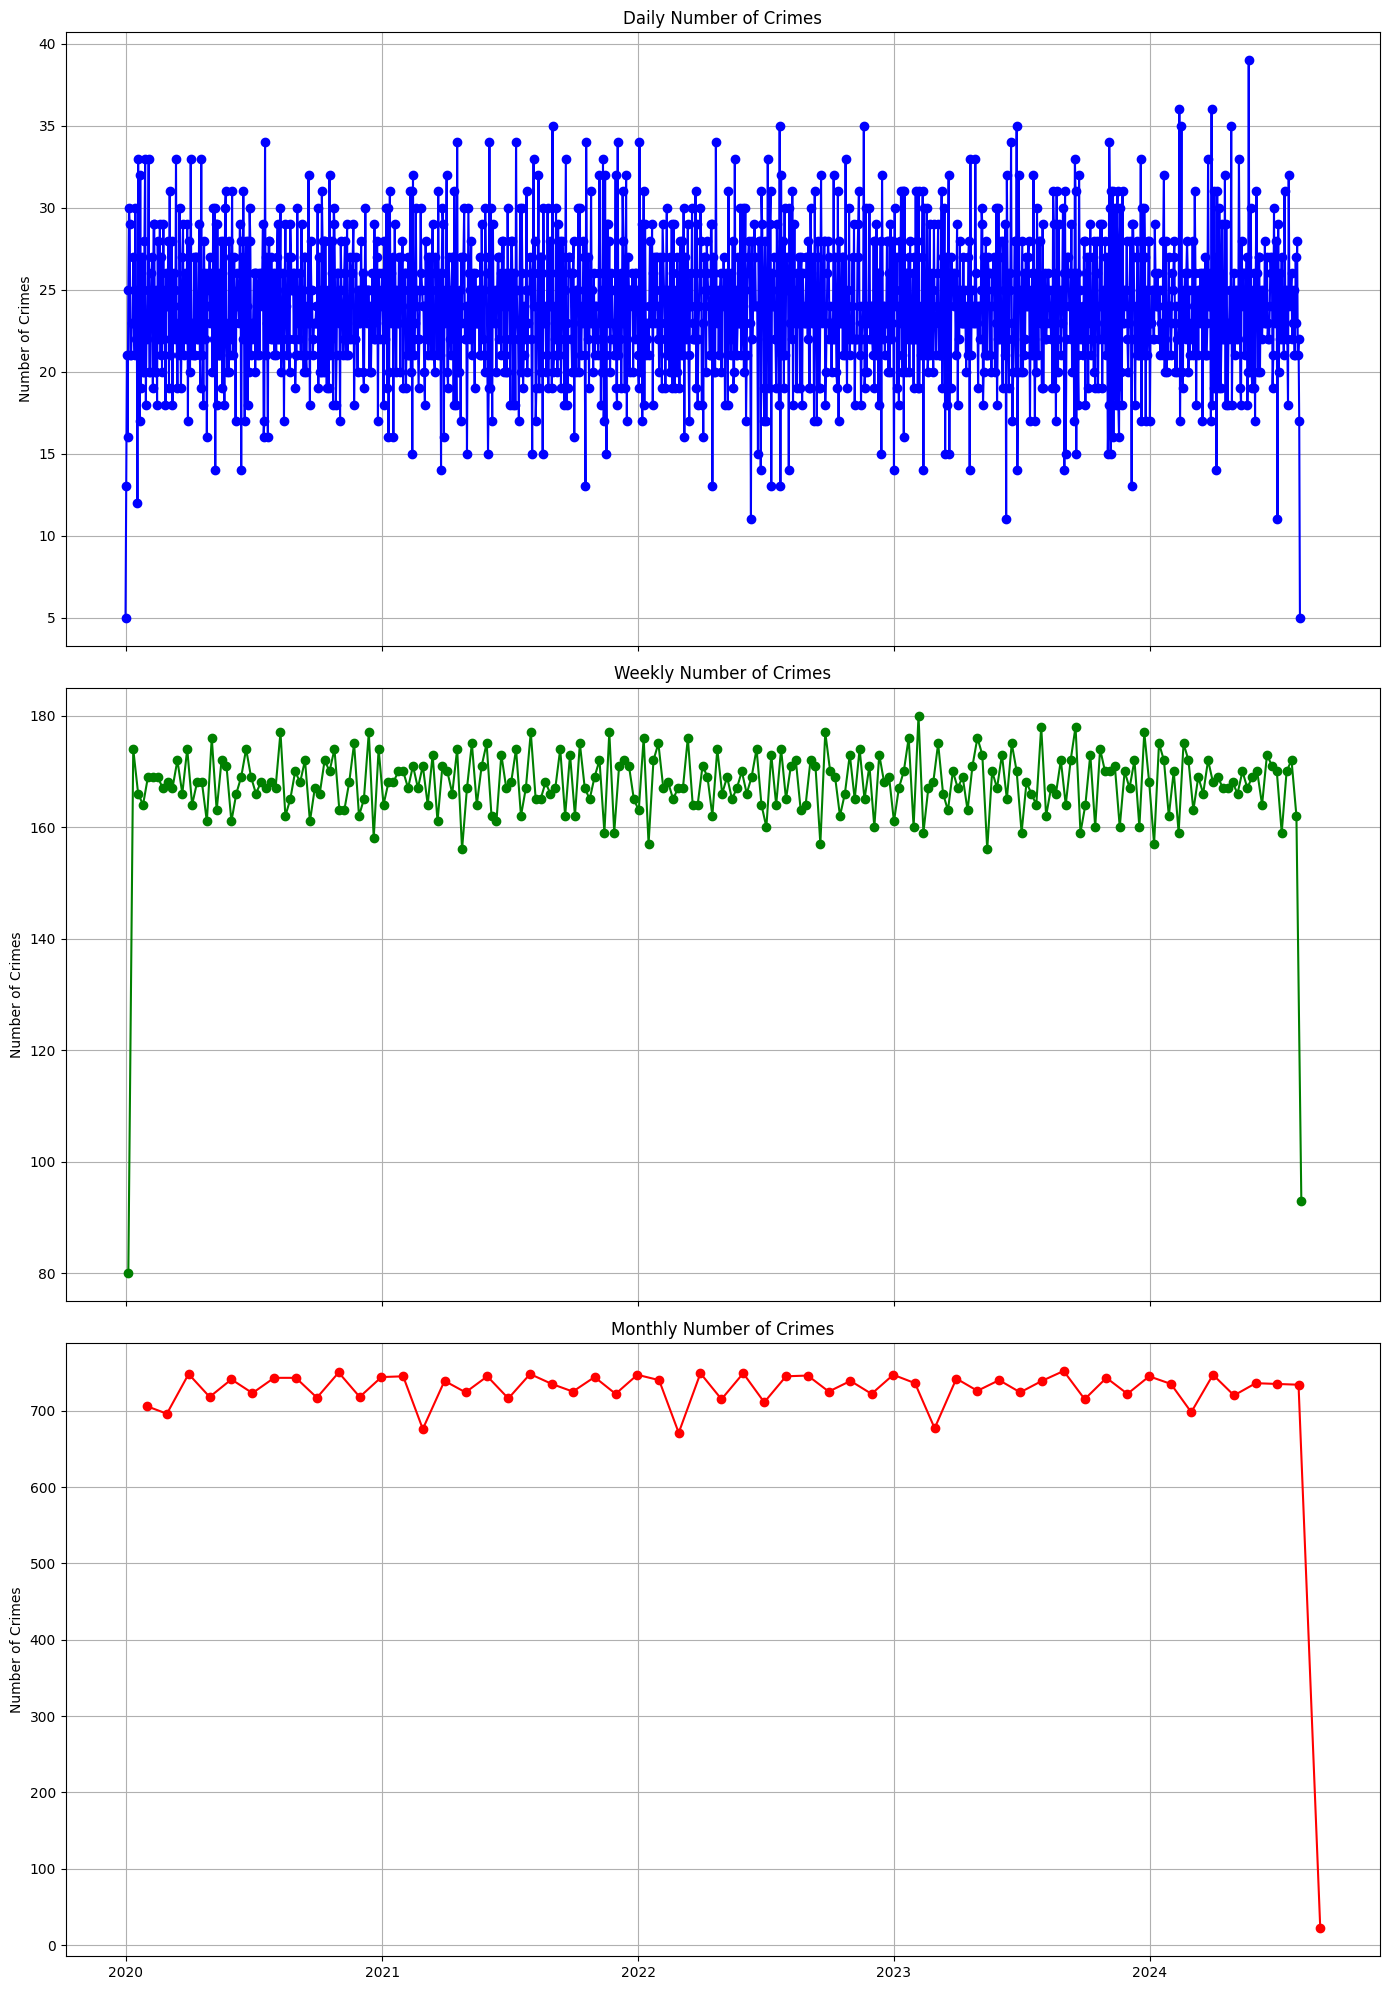

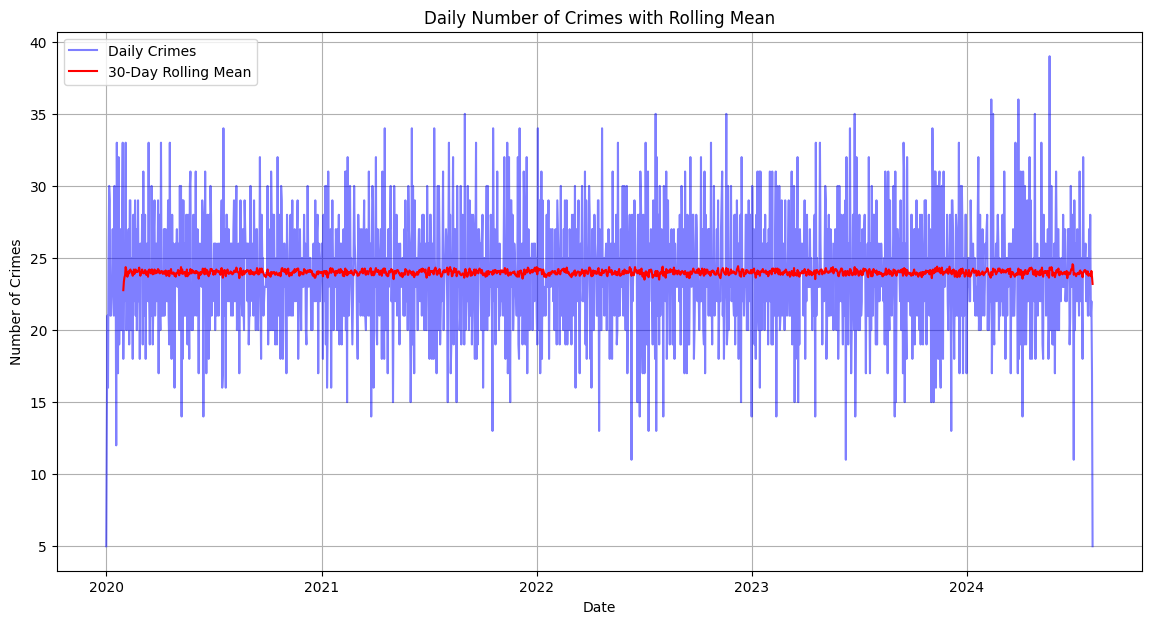

In [4]:
# Create a copy of the original dataset to avoid modifying the original data
data_copy = data.copy()

# Convert the 'date_reported' column to datetime format
data_copy['date_reported'] = pd.to_datetime(data_copy['date_reported'])

# Set the 'date_reported' column as the index for resampling
data_copy.set_index('date_reported', inplace=True)

# Resample and aggregate data to get counts of crimes
daily_data = data_copy.resample('D').size()  # Daily counts
weekly_data = data_copy.resample('W').size()  # Weekly counts
monthly_data = data_copy.resample('M').size()  # Monthly counts
yearly_data = data_copy.resample('Y').size()  # Yearly counts

# Create subplots for visualizing crime trends
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 20), sharex=True)

# Plot daily trends
axes[0].plot(daily_data.index, daily_data.values, marker='o', color='b')
axes[0].set_title('Daily Number of Crimes')
axes[0].set_ylabel('Number of Crimes')
axes[0].grid(True)

# Plot weekly trends
axes[1].plot(weekly_data.index, weekly_data.values, marker='o', color='g')
axes[1].set_title('Weekly Number of Crimes')
axes[1].set_ylabel('Number of Crimes')
axes[1].grid(True)

# Plot monthly trends
axes[2].plot(monthly_data.index, monthly_data.values, marker='o', color='r')
axes[2].set_title('Monthly Number of Crimes')
axes[2].set_ylabel('Number of Crimes')
axes[2].grid(True)

# Improve layout and show the plots
plt.tight_layout()
plt.show()

# Additional Analysis: Seasonal patterns and anomalies
# Calculate the rolling mean for daily data to detect trends and anomalies
rolling_window = 30  # Rolling window size (30 days)
daily_data_rolling = daily_data.rolling(window=rolling_window).mean()

# Plot daily crimes with a 30-day rolling mean
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data.values, label='Daily Crimes', color='b', alpha=0.5)
plt.plot(daily_data_rolling.index, daily_data_rolling.values, label='30-Day Rolling Mean', color='r')
plt.title('Daily Number of Crimes with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.show()


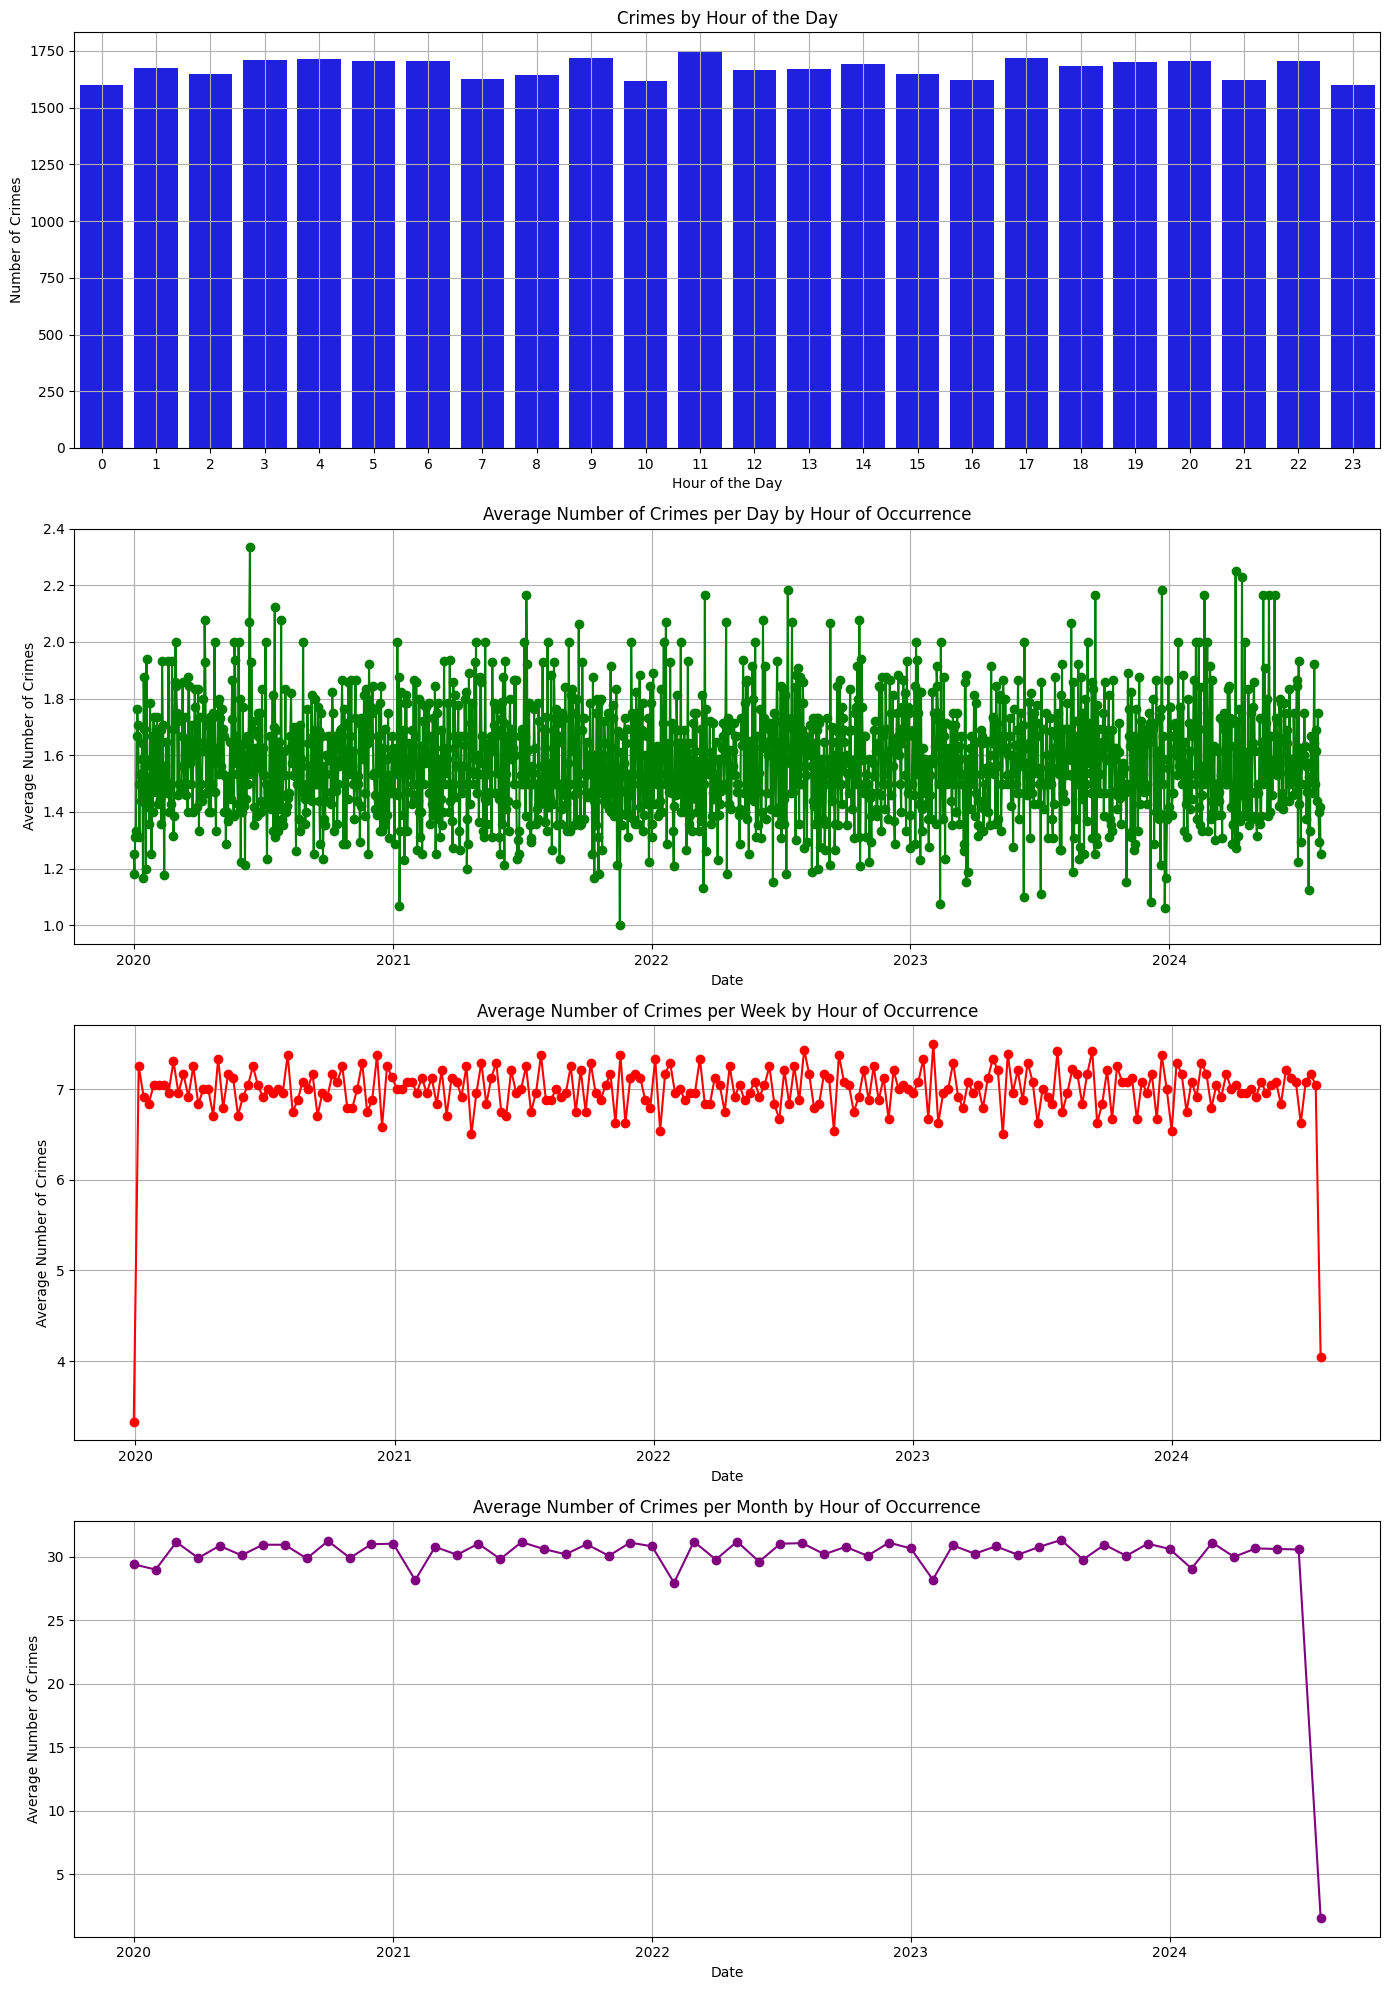

In [5]:
data_copy = data.copy()

# Convert 'time_of_occurrence' to datetime format (with a dummy date)
data_copy['time_of_occurrence'] = pd.to_datetime(data_copy['time_of_occurrence'], format='%H:%M', errors='coerce').dt.time

# Convert 'date_reported' to datetime format if it's not already
data_copy['date_reported'] = pd.to_datetime(data_copy['date_reported'])

# Extract hours from 'time_of_occurrence'
data_copy['hour_of_occurrence'] = data_copy['time_of_occurrence'].apply(lambda x: x.hour if pd.notnull(x) else None)

# Drop rows where hour_of_occurrence is None
data_copy = data_copy.dropna(subset=['hour_of_occurrence'])

# Reset index to access datetime information if needed
data_copy.reset_index(drop=True, inplace=True)

# Aggregate data
hourly_data = data_copy.groupby('hour_of_occurrence').size()

# Average counts for each time period
daily_data = data_copy.groupby([data_copy['date_reported'].dt.date, 'hour_of_occurrence']).size().groupby(level=0).mean()
weekly_data = data_copy.groupby([data_copy['date_reported'].dt.to_period('W').apply(lambda r: r.start_time), 'hour_of_occurrence']).size().groupby(level=0).mean()
monthly_data = data_copy.groupby([data_copy['date_reported'].dt.to_period('M').apply(lambda r: r.start_time), 'hour_of_occurrence']).size().groupby(level=0).mean()

# Convert index to datetime for plotting
daily_data.index = pd.to_datetime(daily_data.index)
weekly_data.index = pd.to_datetime(weekly_data.index)
monthly_data.index = pd.to_datetime(monthly_data.index)

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 20))

# Hourly Trends
sns.barplot(x=hourly_data.index, y=hourly_data.values, ax=axes[0], color='b')
axes[0].set_title('Crimes by Hour of the Day')
axes[0].set_ylabel('Number of Crimes')
axes[0].set_xlabel('Hour of the Day')
axes[0].grid(True)

# Daily Trends
daily_data.index = pd.DatetimeIndex(daily_data.index)
axes[1].plot(daily_data.index, daily_data.values, marker='o', color='g')
axes[1].set_title('Average Number of Crimes per Day by Hour of Occurrence')
axes[1].set_ylabel('Average Number of Crimes')
axes[1].set_xlabel('Date')
axes[1].grid(True)

# Weekly Trends
weekly_data.index = pd.DatetimeIndex(weekly_data.index)
axes[2].plot(weekly_data.index, weekly_data.values, marker='o', color='r')
axes[2].set_title('Average Number of Crimes per Week by Hour of Occurrence')
axes[2].set_ylabel('Average Number of Crimes')
axes[2].set_xlabel('Date')
axes[2].grid(True)

# Monthly Trends
monthly_data.index = pd.DatetimeIndex(monthly_data.index)
axes[3].plot(monthly_data.index, monthly_data.values, marker='o', color='purple')
axes[3].set_title('Average Number of Crimes per Month by Hour of Occurrence')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Average Number of Crimes')
axes[3].grid(True)

# Improve layout
plt.tight_layout()
plt.show()

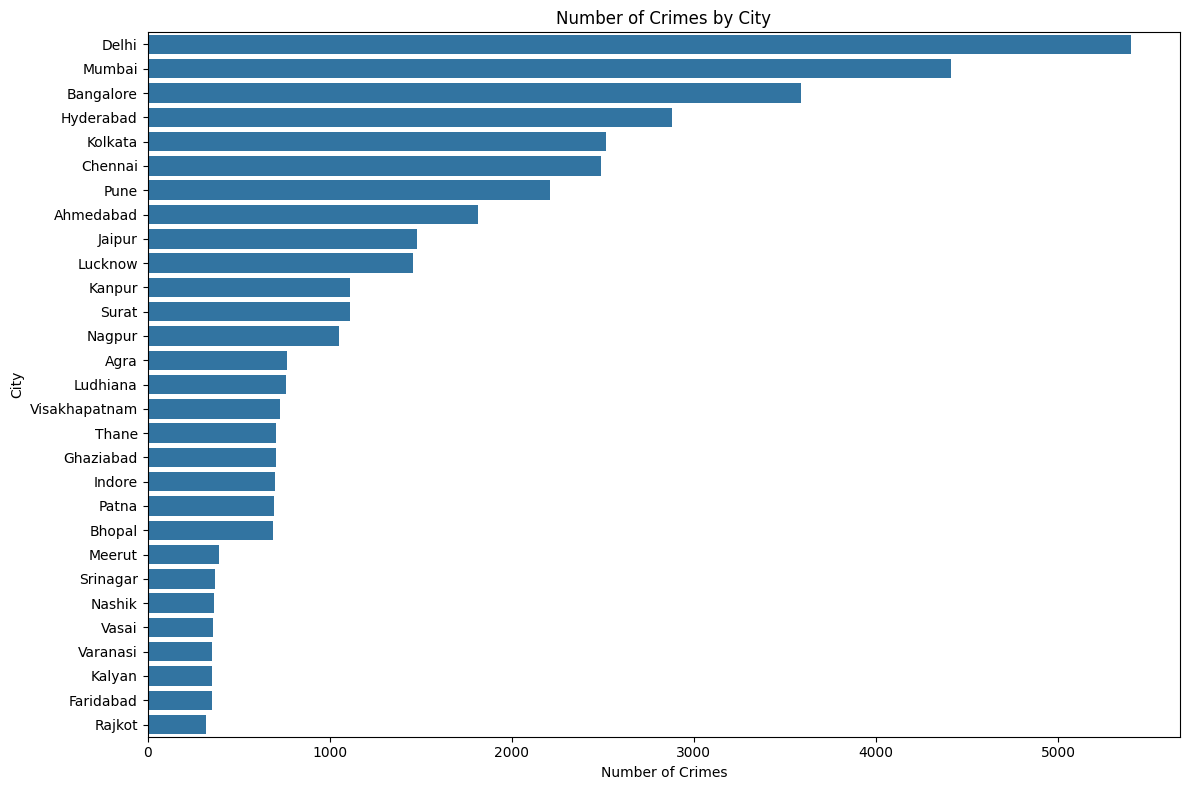

In [6]:
# Basic Data Cleaning (if needed)
data['city'] = data['city'].astype(str)

# Aggregate data by city
city_crime_counts = data['city'].value_counts()

# Create a DataFrame for plotting
city_crime_df = pd.DataFrame({
    'City': city_crime_counts.index,
    'Number of Crimes': city_crime_counts.values
})

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Crimes', y='City', data=city_crime_df)
plt.title('Number of Crimes by City')
plt.ylabel('City')
plt.xlabel('Number of Crimes')
plt.grid(False)
plt.tight_layout()
plt.show()

In [7]:
# Ensure 'crime_code' is an integer type
# data['crime_code'] = data['crime_code'].astype(int)

# Calculate frequency of each crime code
crime_code_counts = data['crime_code'].value_counts().sort_index()

# Create a DataFrame for Plotly
crime_code_df = pd.DataFrame({
    'Crime Code': crime_code_counts.index,
    'Number of Crimes': crime_code_counts.values
})

# Plot pie chart for crime code frequencies
fig = px.pie(crime_code_df, names='Crime Code', values='Number of Crimes',
             title='Proportion of Crimes by Crime Code',
             color='Crime Code', 
             color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(margin=dict(t=40, b=0, l=0, r=0))
fig.show()

In [8]:
data_copy = data.copy()

# Ensure 'date_of_occurrence' column is in datetime format
data_copy['date_of_occurrence'] = pd.to_datetime(data_copy['date_of_occurrence'])

# Extract hour from 'date_of_occurrence'
data_copy['hour_of_day'] = data_copy['date_of_occurrence'].dt.hour

# Create a DataFrame for heatmap
heatmap_data = pd.crosstab(data_copy['hour_of_day'], data_copy['crime_code'])

# Plot heatmap for crime codes by hour of day
fig = px.imshow(heatmap_data,
                labels={'x': 'Crime Code', 'y': 'Hour of Day', 'color': 'Number of Crimes'},
                title='Heatmap of Crime Codes by Hour of Day',
                color_continuous_scale='Viridis')

fig.update_layout(margin=dict(t=40, b=0, l=0, r=0))
fig.show()

In [9]:
# Extract day of the week from 'date_of_occurrence'
data_copy['day_of_week'] = data_copy['date_of_occurrence'].dt.day_name()

# Create a DataFrame for heatmap
heatmap_data_week = pd.crosstab(data_copy['day_of_week'], data_copy['crime_code'])

# Plot heatmap for crime codes by day of the week
fig = px.imshow(heatmap_data_week,
                labels={'x': 'Crime Code', 'y': 'Day of Week', 'color': 'Number of Crimes'},
                title='Heatmap of Crime Codes by Day of Week',
                color_continuous_scale='Viridis')

fig.update_layout(margin=dict(t=40, b=0, l=0, r=0))
fig.show()

In [10]:
# Extract month from 'date_of_occurrence'
data_copy['month'] = data_copy['date_of_occurrence'].dt.month_name()

# Create a DataFrame for heatmap
heatmap_data_month = pd.crosstab(data_copy['month'], data_copy['crime_code'])

# Plot heatmap for crime codes by month
fig = px.imshow(heatmap_data_month,
                labels={'x': 'Crime Code', 'y': 'Month', 'color': 'Number of Crimes'},
                title='Heatmap of Crime Codes by Month',
                color_continuous_scale='Viridis')

fig.update_layout(margin=dict(t=40, b=0, l=0, r=0))
fig.show()

In [11]:
# Create a copy of the dataset to avoid modifying the original data
data_copy = data.copy()

# Ensure 'crime_description' column is of string type
data_copy['crime_description'] = data_copy['crime_description'].astype(str)

# Preprocess text: remove punctuation, convert to lower case
data_copy['crime_description_clean'] = data_copy['crime_description'].str.replace(r'[^\w\s]', '', regex=True).str.lower()

# Display the first few rows to verify cleaning
print(data_copy[['crime_description', 'crime_description_clean']].head())

              crime_description crime_description_clean
report_number                                          
1                IDENTITY THEFT          identity theft
2                      HOMICIDE                homicide
3                    KIDNAPPING              kidnapping
4                      BURGLARY                burglary
5                     VANDALISM               vandalism


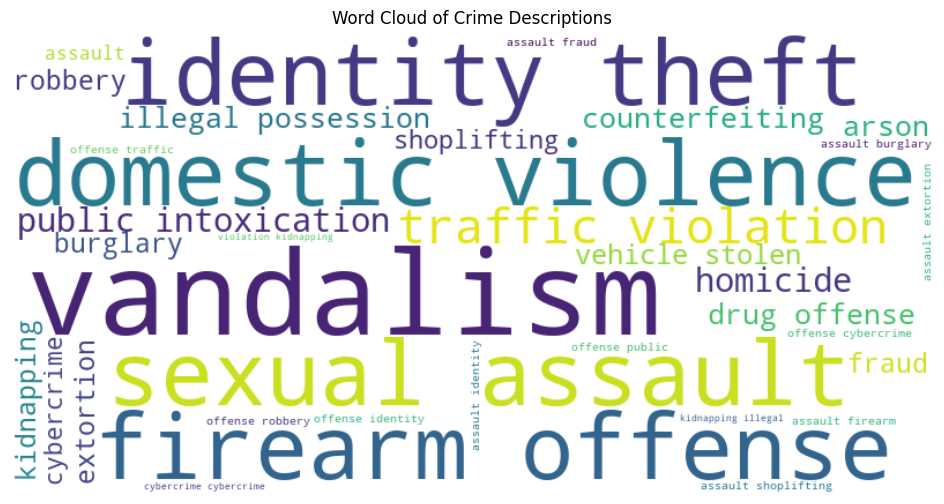

In [12]:
# Generate a word cloud for crime descriptions
text = ' '.join(description for description in data_copy['crime_description_clean'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, colormap='viridis').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Crime Descriptions')
plt.show()
# Create a count vectorizer to analyze word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=50)  # Adjust max_features as needed
X = vectorizer.fit_transform(data_copy['crime_description_clean'])
word_freq = X.sum(axis=0).A1
word_freq_df = pd.DataFrame({'Word': vectorizer.get_feature_names_out(), 'Frequency': word_freq})


crime_description
BURGLARY               1980
VANDALISM              1975
FRAUD                  1965
DOMESTIC VIOLENCE      1932
FIREARM OFFENSE        1931
ROBBERY                1928
KIDNAPPING             1920
IDENTITY THEFT         1918
SEXUAL ASSAULT         1917
TRAFFIC VIOLATION      1915
ASSAULT                1915
PUBLIC INTOXICATION    1912
HOMICIDE               1909
CYBERCRIME             1899
ILLEGAL POSSESSION     1895
ARSON                  1894
DRUG OFFENSE           1890
EXTORTION              1873
COUNTERFEITING         1871
VEHICLE - STOLEN       1862
SHOPLIFTING            1859
Name: count, dtype: int64


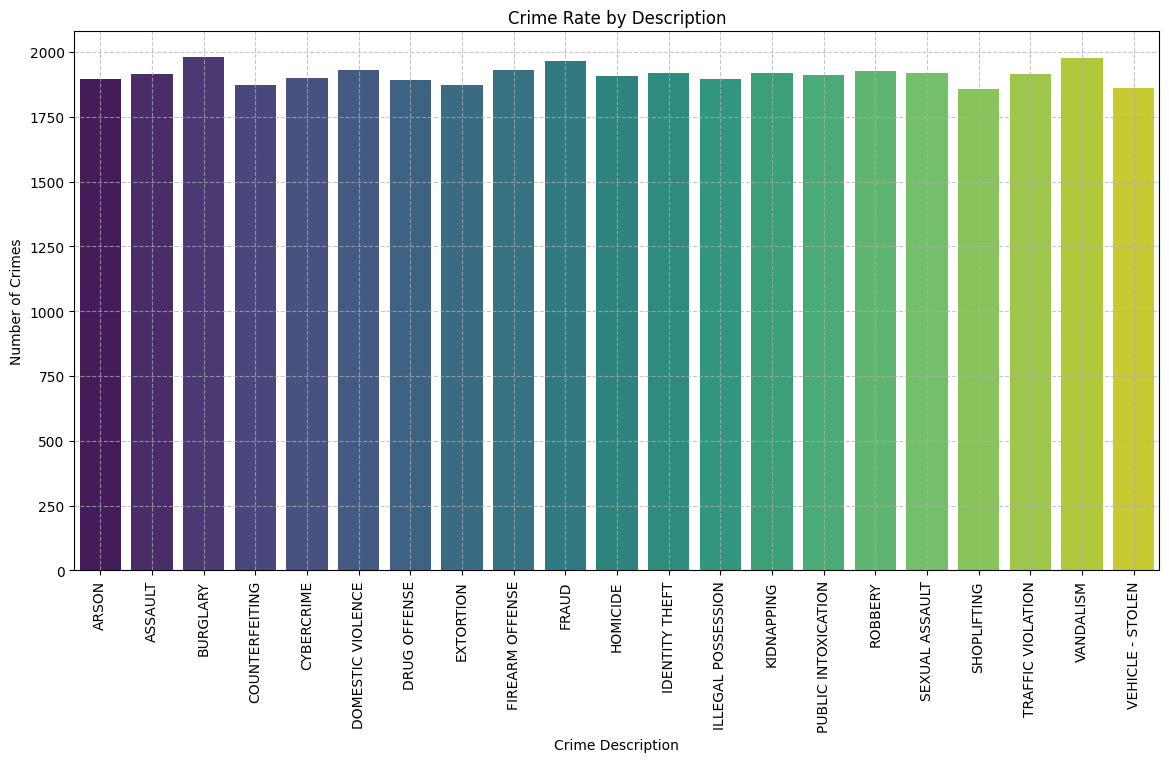

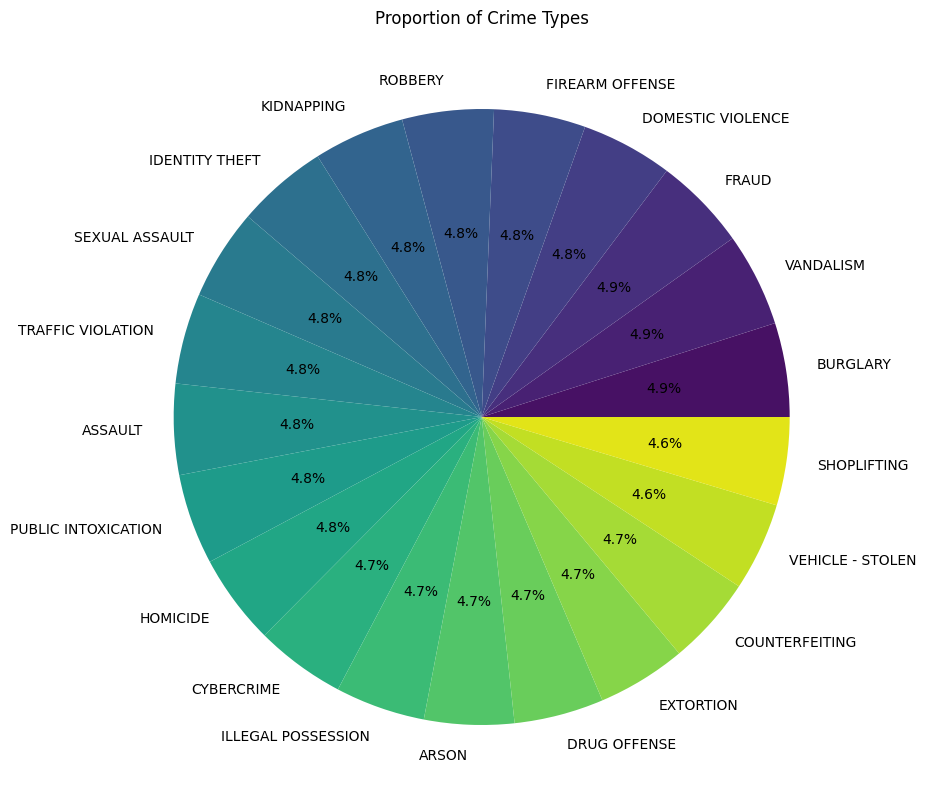

In [13]:
# Ensure 'crime_description' column is treated as categorical
data['crime_description'] = data['crime_description'].astype('category')

# Calculate crime frequency
crime_frequency = data['crime_description'].value_counts()

# Print out the most common crimes
print(crime_frequency)

# Plot crime frequency distribution
plt.figure(figsize=(14, 7))
sns.barplot(x=crime_frequency.index, y=crime_frequency.values, palette='viridis')
plt.title('Crime Rate by Description')
plt.xlabel('Crime Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot crime frequency as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(crime_frequency, labels=crime_frequency.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(crime_frequency)))
plt.title('Proportion of Crime Types')
plt.show()

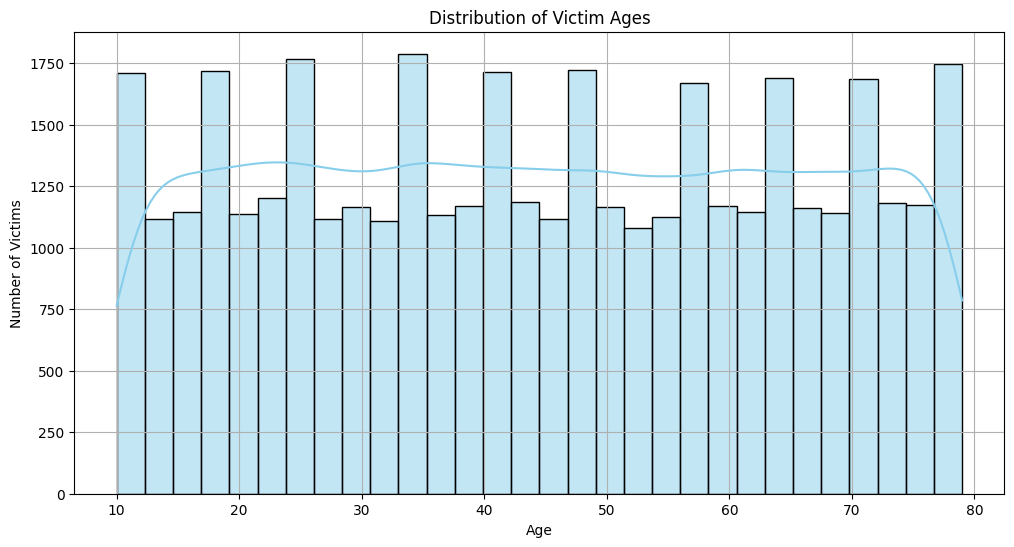

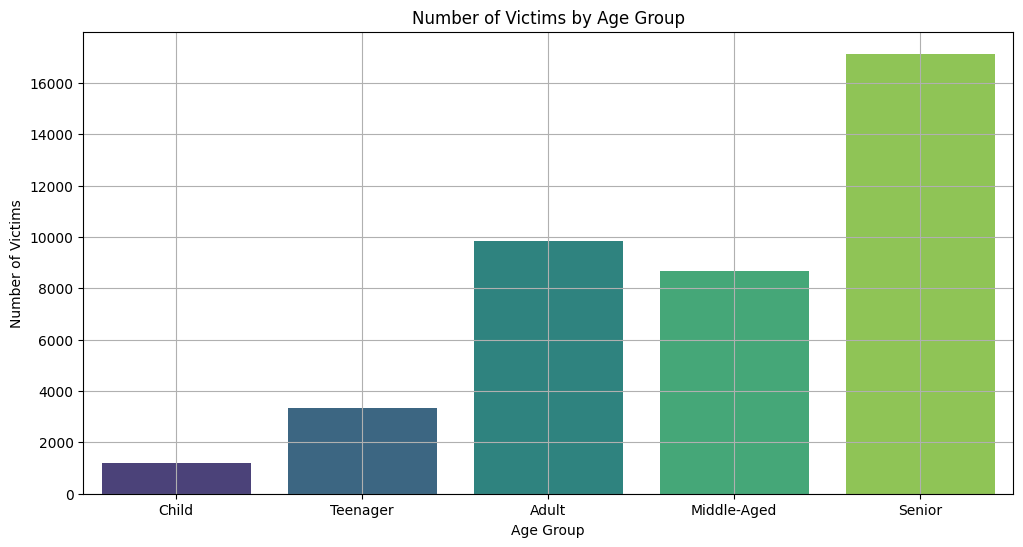

In [14]:
# Ensure 'victim_age' column is numeric
data['victim_age'] = pd.to_numeric(data['victim_age'], errors='coerce')

# Drop rows with NaN values in 'victim_age'
data = data.dropna(subset=['victim_age'])

# Create age groups
bins = [0, 12, 18, 35, 50, 100]  # Define age bins
labels = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']  # Define labels
data['age_group'] = pd.cut(data['victim_age'], bins=bins, labels=labels, right=False)

# Plot age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['victim_age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.show()

# Plot age group counts
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', data=data, palette='viridis')
plt.title('Number of Victims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.show()

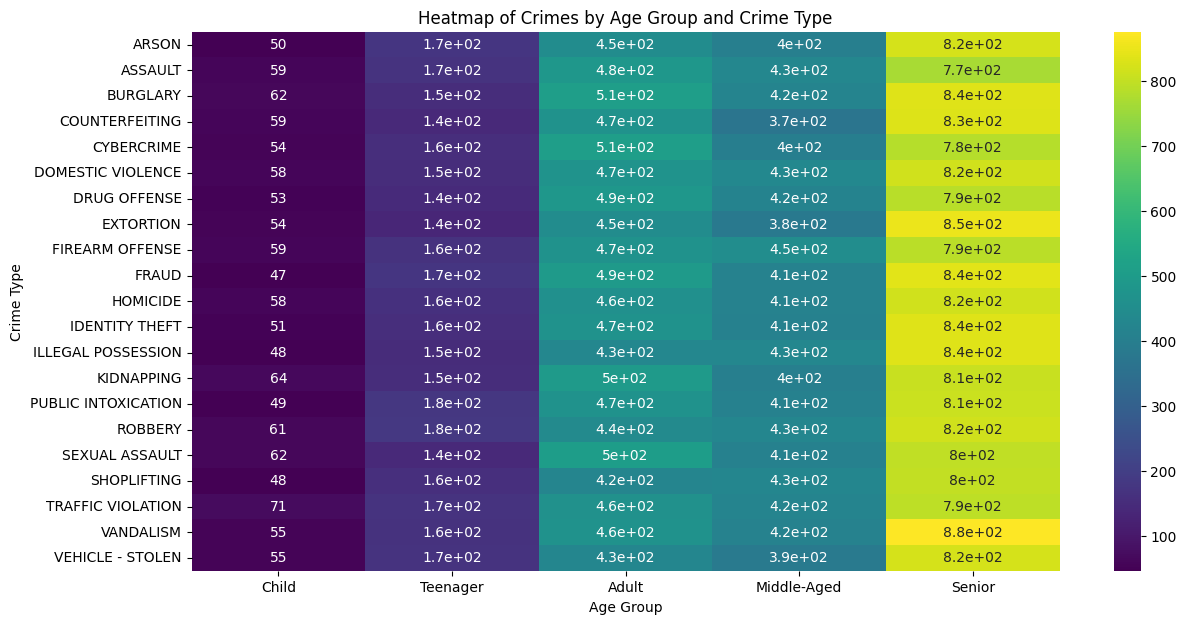

In [15]:
# Aggregate data
age_group_crime_type = data.groupby(['age_group', 'crime_description'], observed=True).size().reset_index(name='count')
    
# Pivot table for heatmap
pivot_table = age_group_crime_type.pivot_table(index='crime_description', columns='age_group', values='count', fill_value=0)
    
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', annot=True)
plt.title('Heatmap of Crimes by Age Group and Crime Type')
plt.ylabel('Crime Type')
plt.xlabel('Age Group')
plt.show()

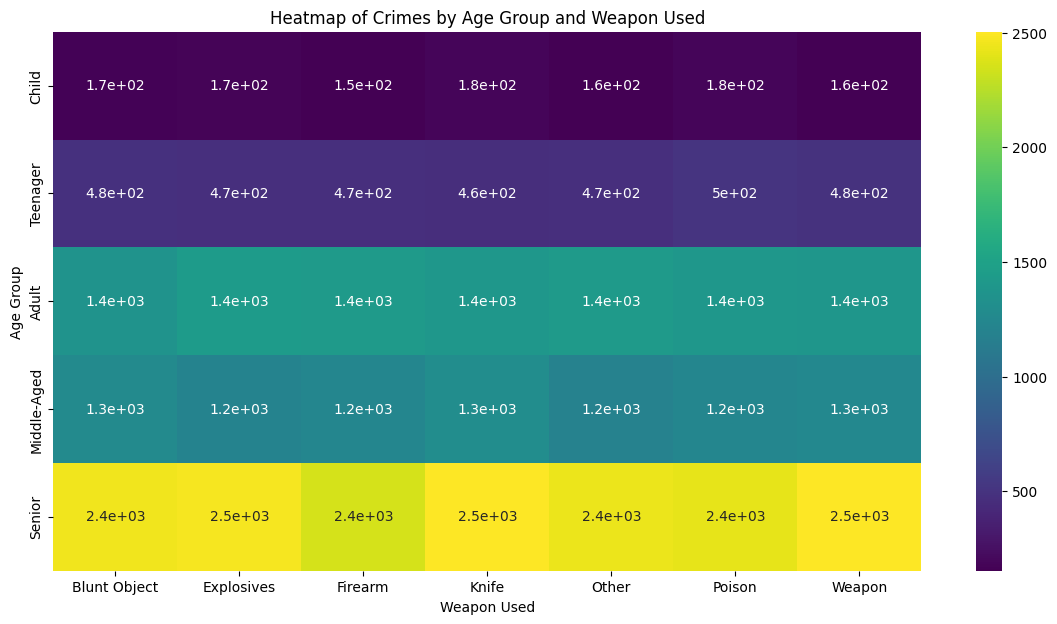

In [16]:
# Aggregate data
age_group_weapon = data.groupby(['age_group', 'weapon_used'], observed=True).size().reset_index(name='count')

# Pivot table for heatmap
pivot_table = age_group_weapon.pivot_table(index='age_group', columns='weapon_used', values='count', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', annot=True)
plt.title('Heatmap of Crimes by Age Group and Weapon Used')
plt.xlabel('Weapon Used')
plt.ylabel('Age Group')
plt.show()

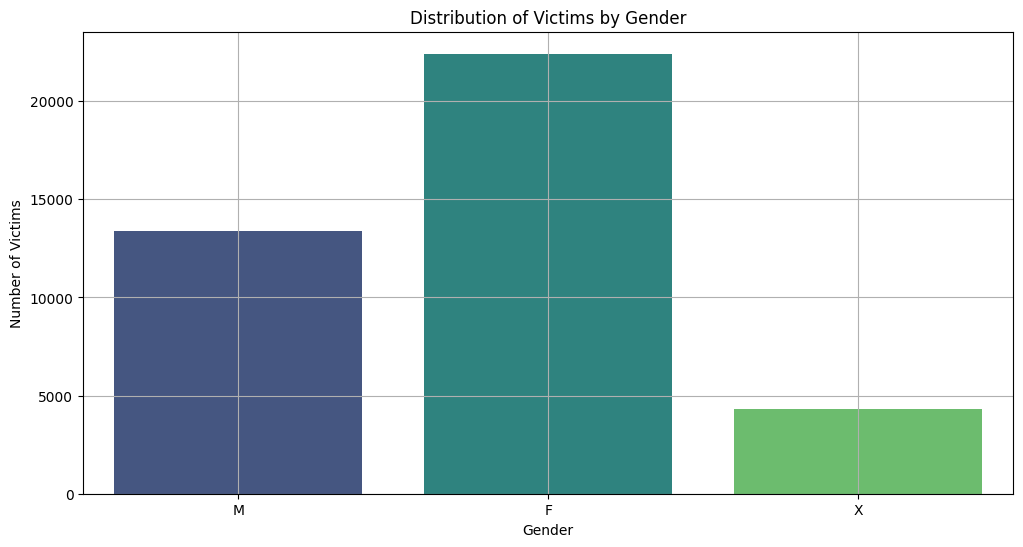

In [17]:
# Plot gender distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='victim_gender', data=data, palette='viridis')
plt.title('Distribution of Victims by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.show()

Text(0.5, 47.7222222222222, 'Victim Gender')

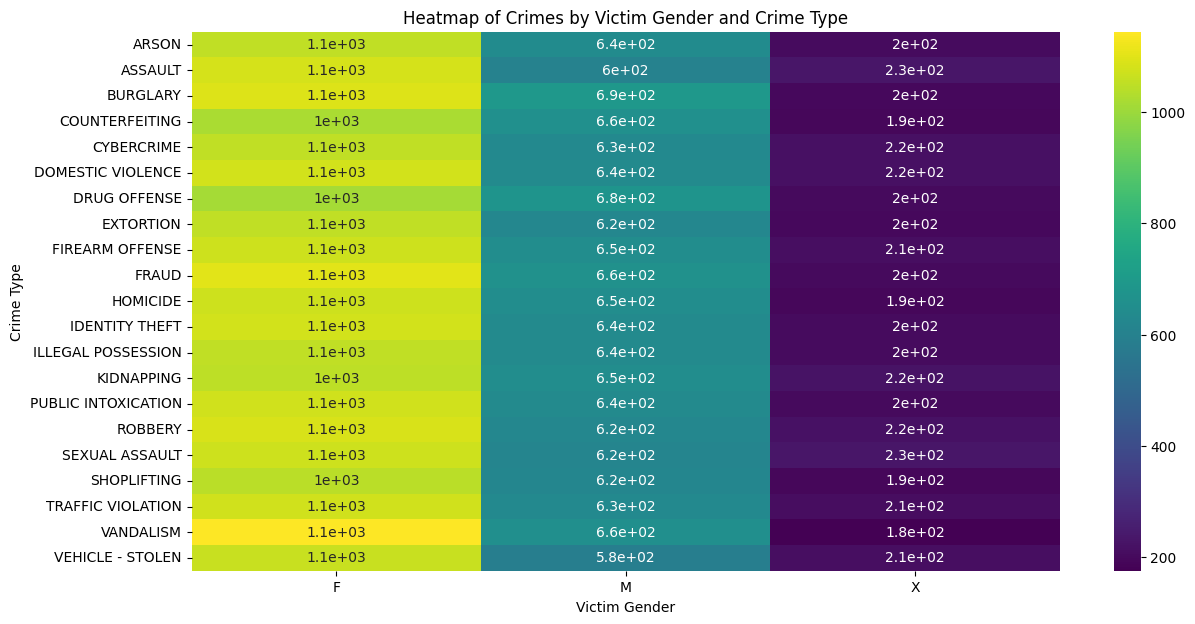

In [18]:
# Analyze correlation with crime types

# Aggregate data
gender_crime_type = data.groupby(['victim_gender', 'crime_description'], observed=True).size().reset_index(name='count')

# Pivot table for heatmap
pivot_table = gender_crime_type.pivot_table(index='crime_description', columns='victim_gender', values='count', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', annot=True)
plt.title('Heatmap of Crimes by Victim Gender and Crime Type')
plt.ylabel('Crime Type')
plt.xlabel('Victim Gender')

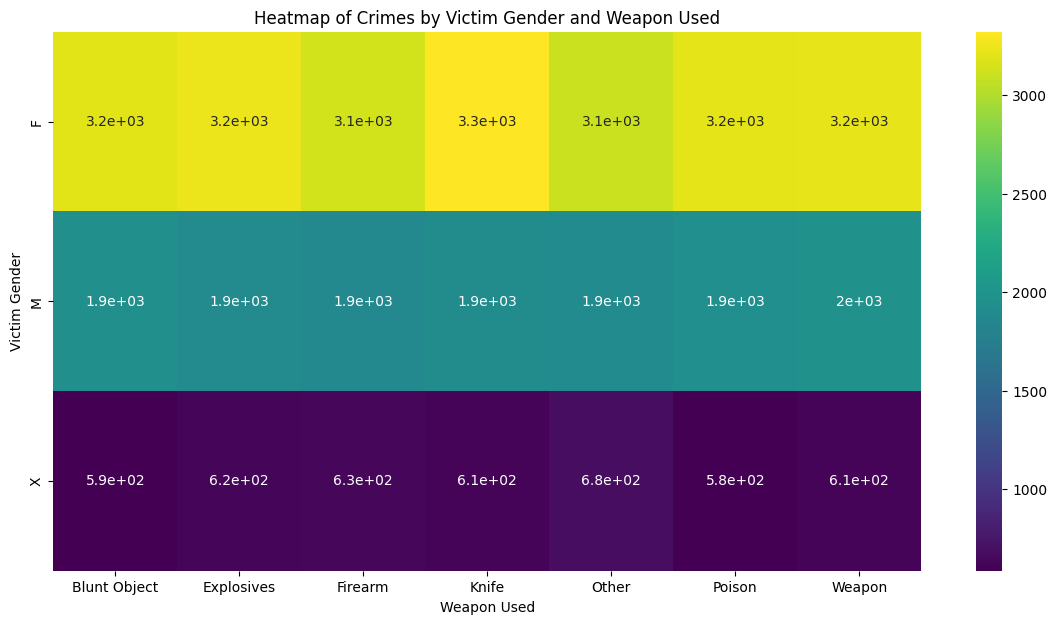

In [19]:
# Analyze correlation with weapon used

# Aggregate data
gender_weapon = data.groupby(['victim_gender', 'weapon_used'], observed=True).size().reset_index(name='count')

# Pivot table for heatmap
pivot_table = gender_weapon.pivot_table(index='victim_gender', columns='weapon_used', values='count', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', annot=True)
plt.title('Heatmap of Crimes by Victim Gender and Weapon Used')
plt.xlabel('Weapon Used')
plt.ylabel('Victim Gender')
plt.show()

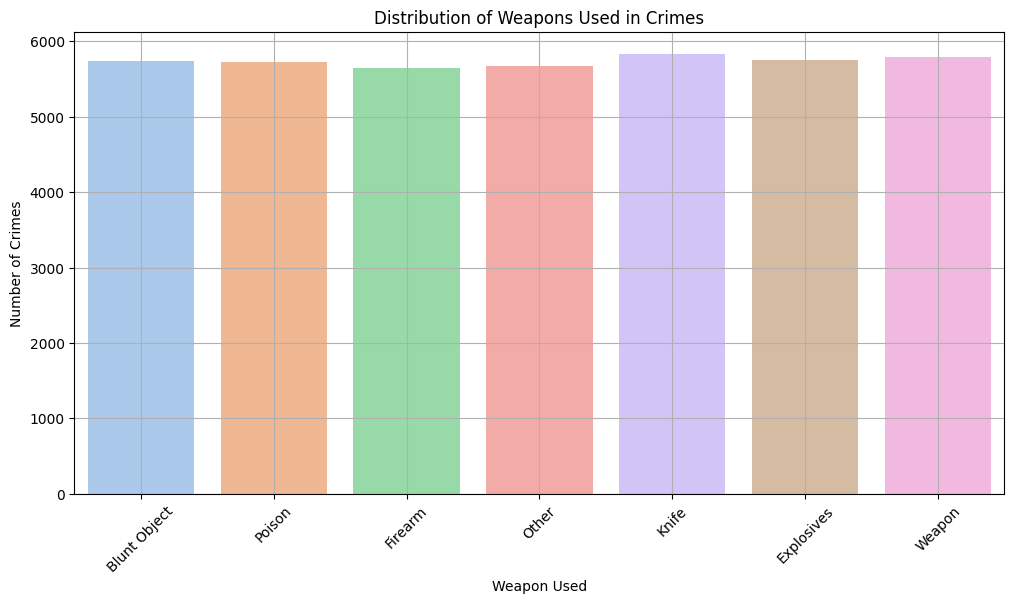

In [20]:
# Drop rows with NaN values in 'weapon_used'
data = data.dropna(subset=['weapon_used'])

# Plot weapon distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='weapon_used', data=data, palette='pastel')
plt.title('Distribution of Weapons Used in Crimes')
plt.xlabel('Weapon Used')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

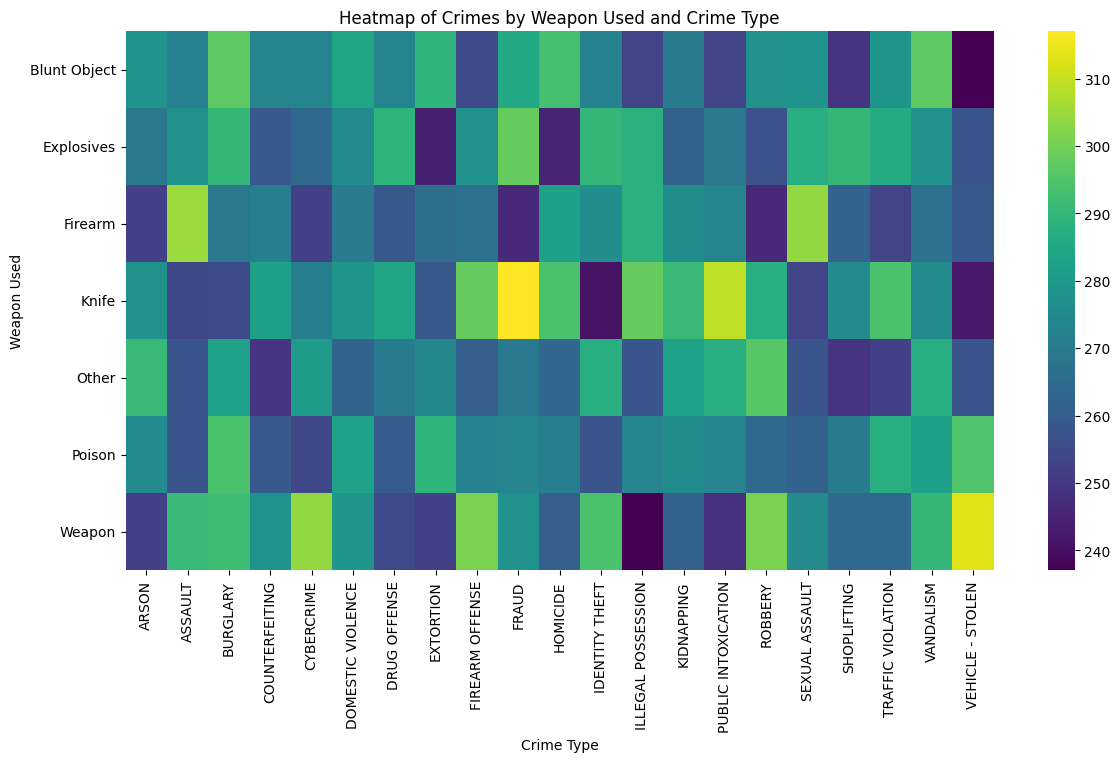

In [21]:
# Analyze correlation with crime types
# Aggregate data
weapon_crime_type = data.groupby(['weapon_used', 'crime_description'], observed=True).size().reset_index(name='count')

# Pivot table for heatmap
pivot_table = weapon_crime_type.pivot_table(index='weapon_used', columns='crime_description', values='count', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', annot=False)
plt.title('Heatmap of Crimes by Weapon Used and Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Weapon Used')
plt.show()

# Analyze correlation with victim demographics
# Ensure 'victim_age' is numeric
data['victim_age'] = pd.to_numeric(data['victim_age'], errors='coerce')
data = data.dropna(subset=['victim_age'])

# Create age groups
bins = [0, 12, 18, 35, 50, 100]  # Define age bins
labels = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']  # Define labels
data['age_group'] = pd.cut(data['victim_age'], bins=bins, labels=labels, right=False)

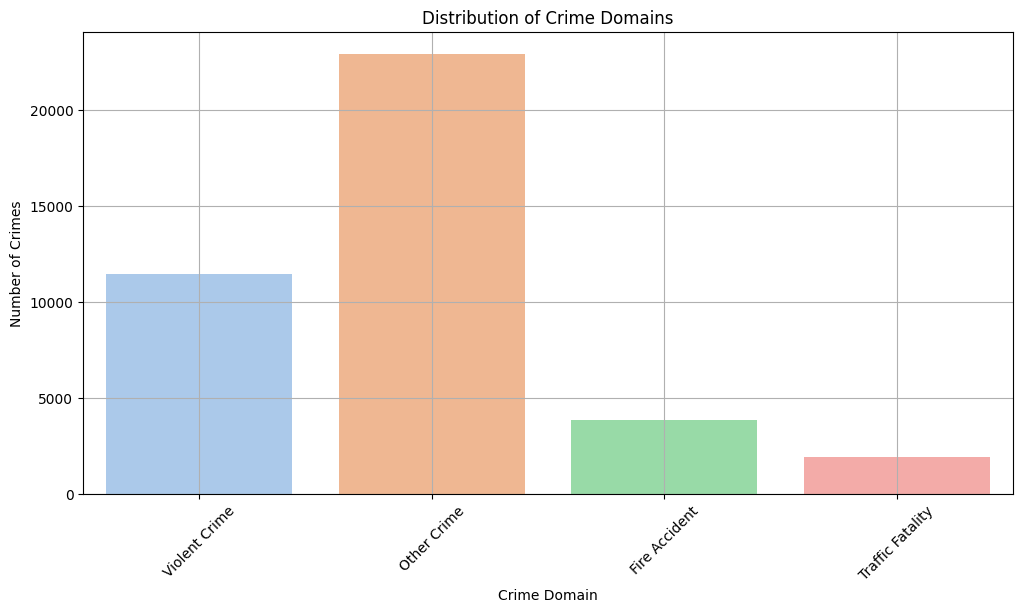

In [22]:
# Plot crime domain distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='crime_domain', data=data, palette='pastel')
plt.title('Distribution of Crime Domains')
plt.xlabel('Crime Domain')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

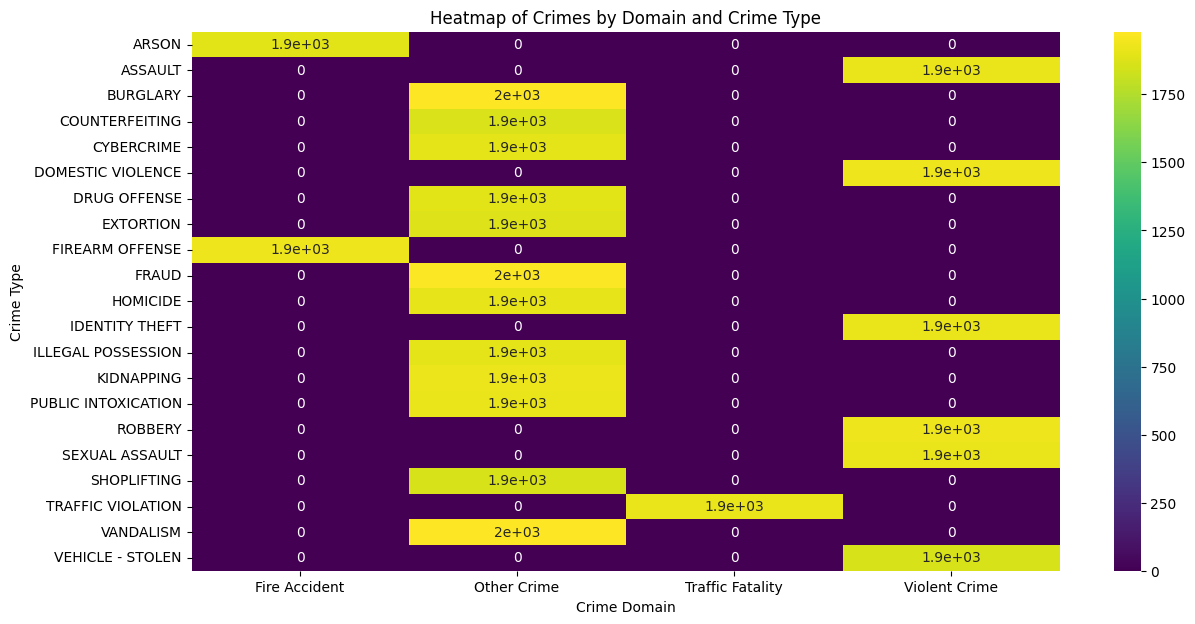

In [23]:
# Aggregate data
domain_crime_type = data.groupby(['crime_domain', 'crime_description'], observed=True).size().reset_index(name='count')

# Pivot table for heatmap
pivot_table = domain_crime_type.pivot_table(index='crime_description', columns='crime_domain', values='count', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', annot=True)
plt.title('Heatmap of Crimes by Domain and Crime Type')
plt.ylabel('Crime Type')
plt.xlabel('Crime Domain')
plt.show()

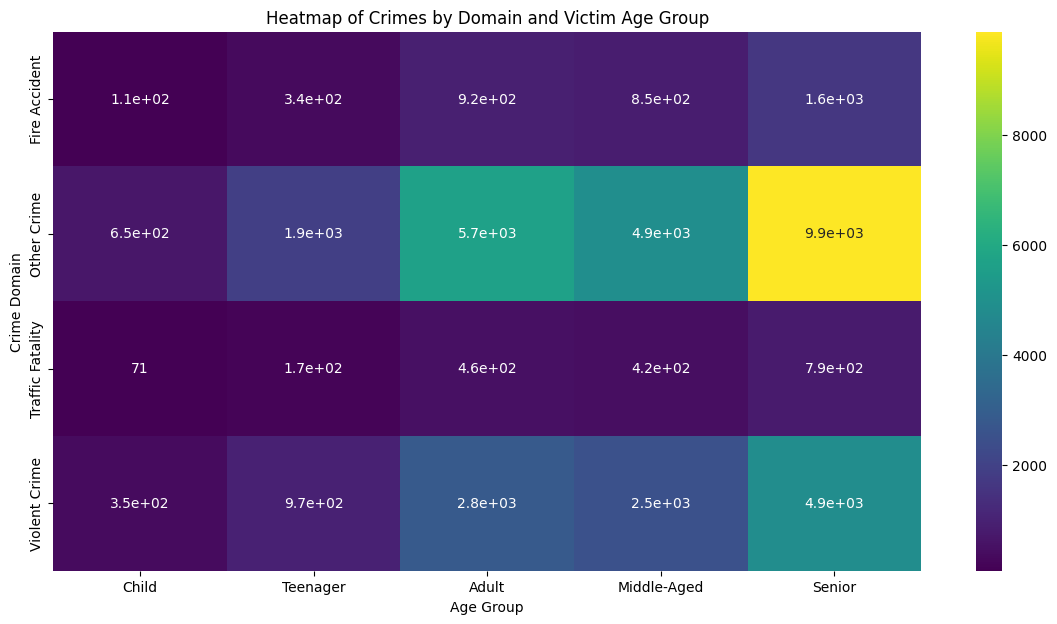

In [24]:
# Ensure 'victim_age' is numeric
data['victim_age'] = pd.to_numeric(data['victim_age'], errors='coerce')
data = data.dropna(subset=['victim_age'])

# Create age groups
bins = [0, 12, 18, 35, 50, 100]  # Define age bins
labels = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']  # Define labels
data['age_group'] = pd.cut(data['victim_age'], bins=bins, labels=labels, right=False)

# Aggregate data for age groups
domain_age_group = data.groupby(['crime_domain', 'age_group'], observed=True).size().reset_index(name='count')

# Pivot table for heatmap
pivot_table = domain_age_group.pivot_table(index='crime_domain', columns='age_group', values='count', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', annot=True)
plt.title('Heatmap of Crimes by Domain and Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Crime Domain')
plt.show()

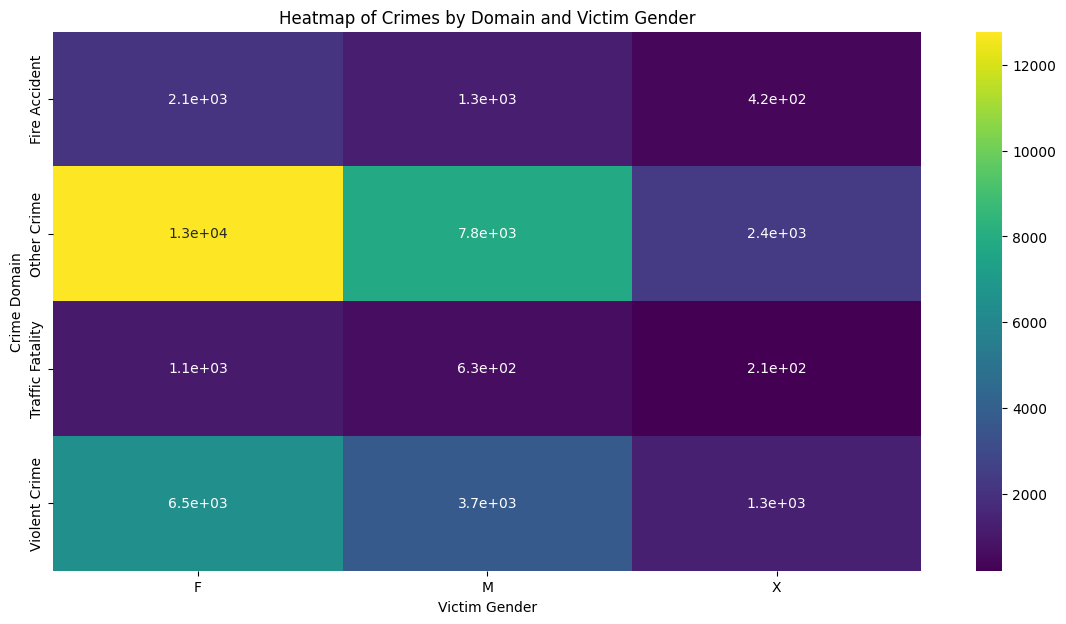

In [25]:
# Aggregate data for gender
domain_gender = data.groupby(['crime_domain', 'victim_gender'], observed=True).size().reset_index(name='count')

# Pivot table for heatmap
pivot_table = domain_gender.pivot_table(index='crime_domain', columns='victim_gender', values='count', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', annot=True)
plt.title('Heatmap of Crimes by Domain and Victim Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Crime Domain')
plt.show()

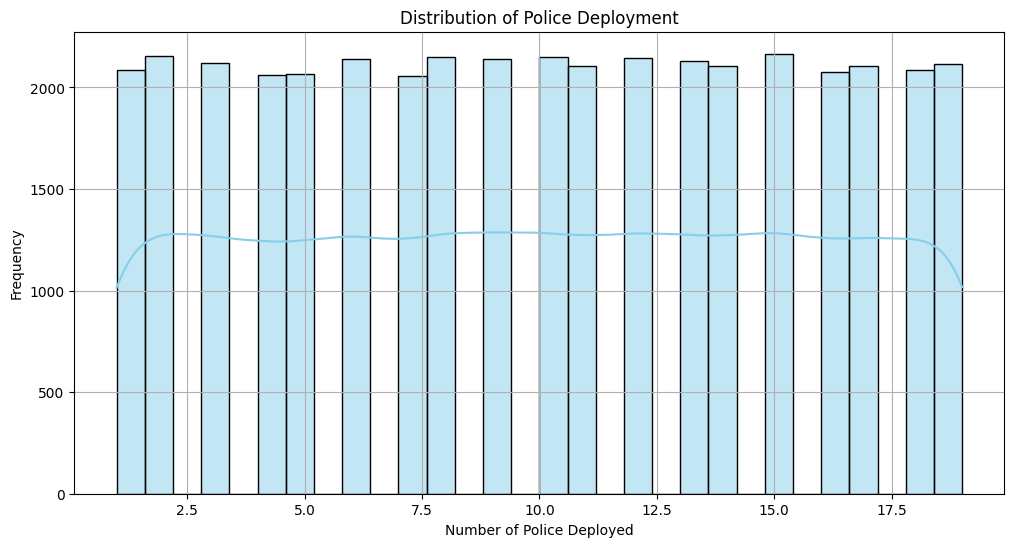

In [26]:
# Ensure 'police_deployed' column is numeric
data['police_deployed'] = pd.to_numeric(data['police_deployed'], errors='coerce')

# Drop rows with NaN values in 'police_deployed'
data = data.dropna(subset=['police_deployed'])

# Visualize the Distribution of Police Deployment
plt.figure(figsize=(12, 6))
sns.histplot(data['police_deployed'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Police Deployment')
plt.xlabel('Number of Police Deployed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

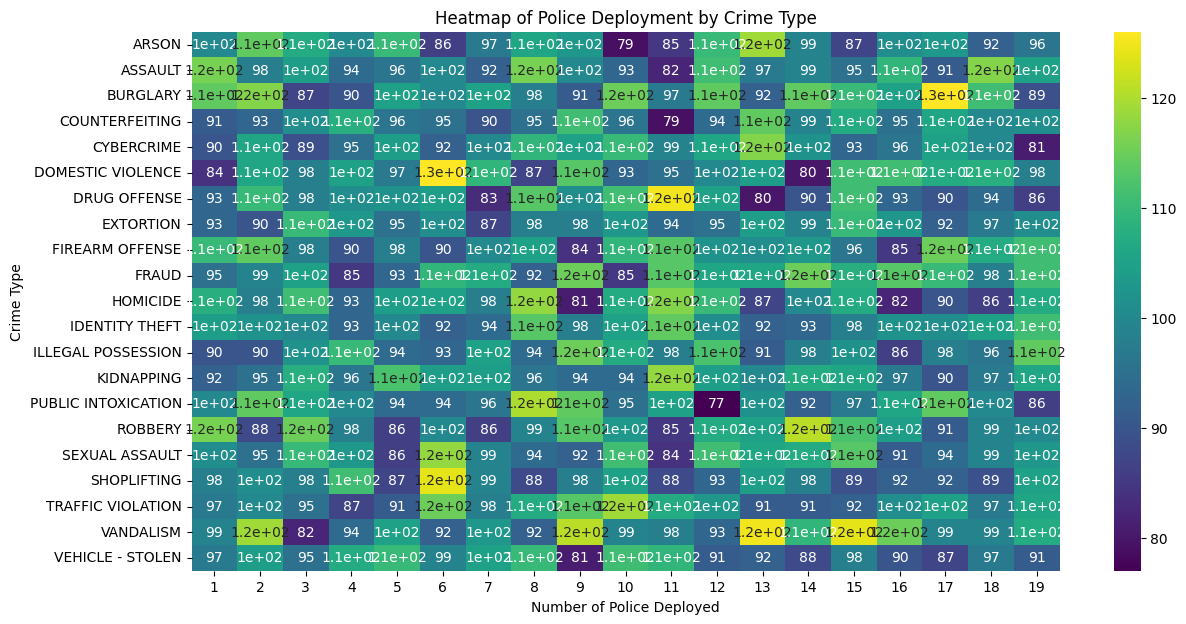

In [27]:
# Analyze Correlation with Crime Types
# Aggregate data
deployment_crime_type = data.groupby(['crime_description', 'police_deployed'], observed=True).size().reset_index(name='count')

# Pivot table for heatmap
pivot_table = deployment_crime_type.pivot_table(index='crime_description', columns='police_deployed', values='count', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', annot=True)
plt.title('Heatmap of Police Deployment by Crime Type')
plt.xlabel('Number of Police Deployed')
plt.ylabel('Crime Type')
plt.show()

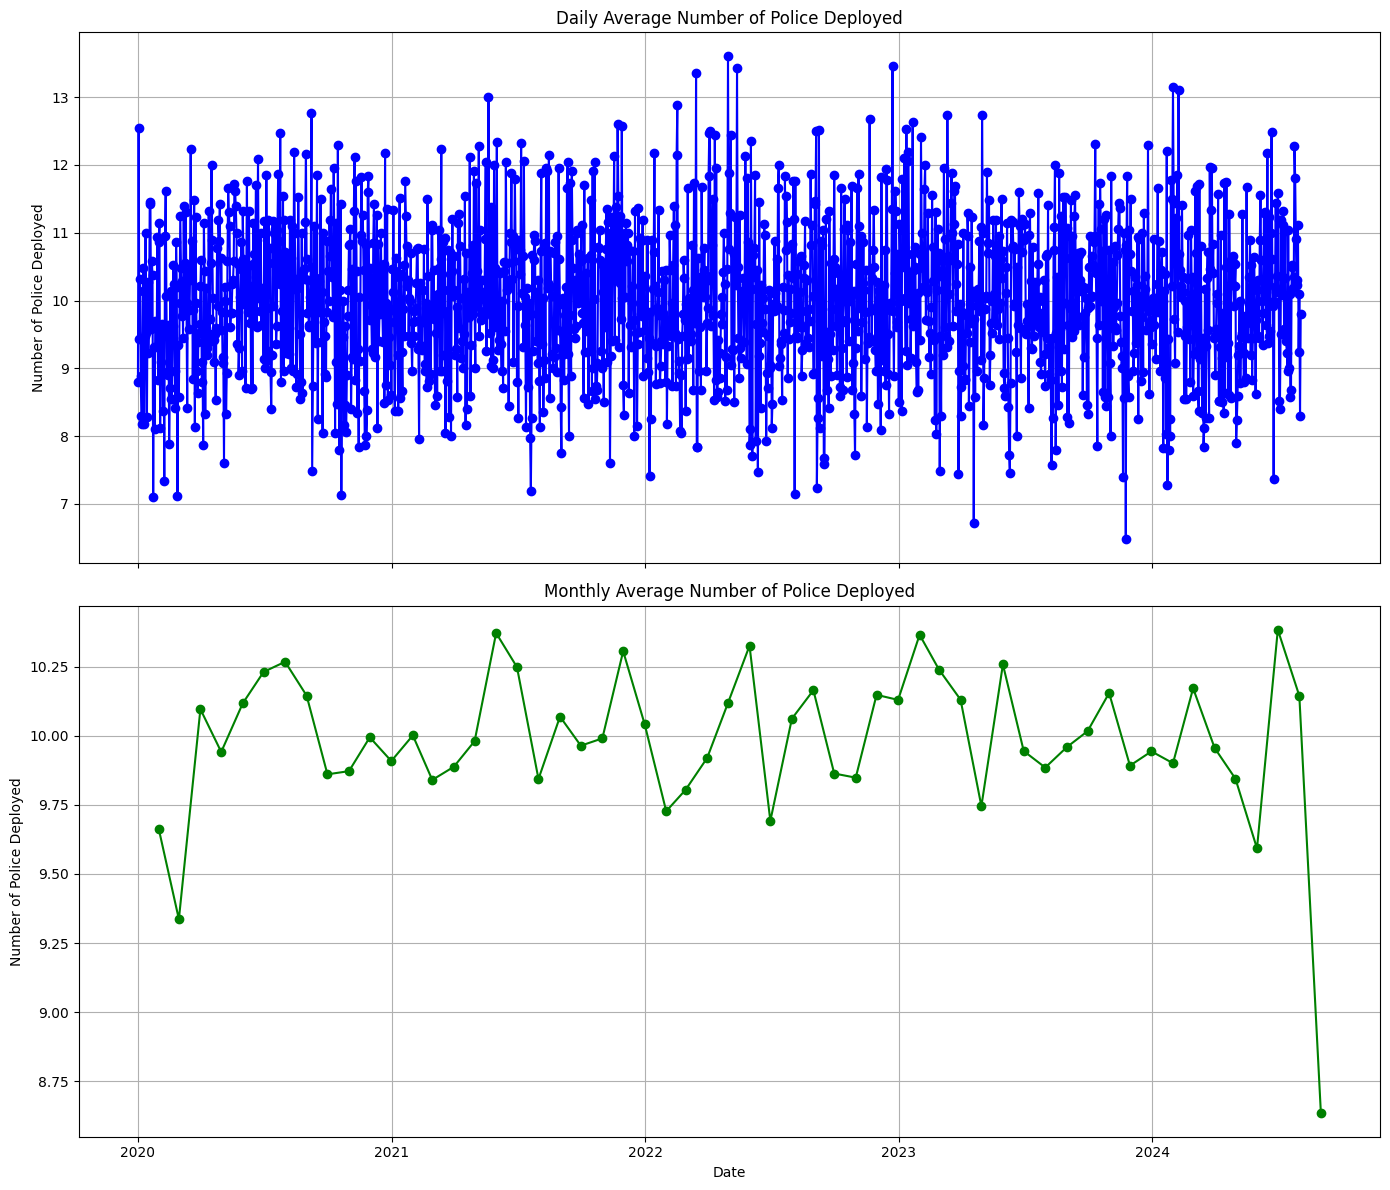

In [28]:
# Copy data for analysis
data_copy = data.copy()

data_copy.set_index('date_reported', inplace=True)


# Resample and aggregate police deployment data
daily_deployment = data_copy['police_deployed'].resample('D').mean()
monthly_deployment = data_copy['police_deployed'].resample('M').mean()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), sharex=True)

# Daily Deployment Trends
axes[0].plot(daily_deployment.index, daily_deployment.values, marker='o', color='b')
axes[0].set_title('Daily Average Number of Police Deployed')
axes[0].set_ylabel('Number of Police Deployed')
axes[0].grid(True)

# Monthly Deployment Trends
axes[1].plot(monthly_deployment.index, monthly_deployment.values, marker='o', color='g')
axes[1].set_title('Monthly Average Number of Police Deployed')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Police Deployed')
axes[1].grid(True)

plt.tight_layout()
plt.show()

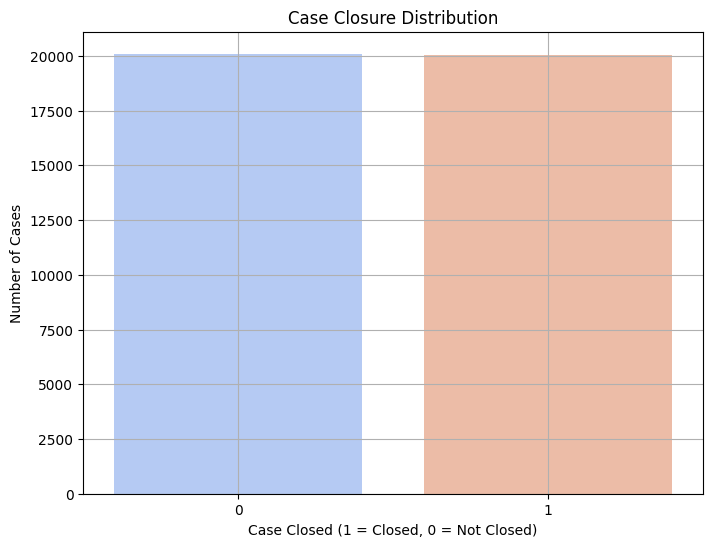

In [29]:
# Convert 'case_closed' to binary (1 for "Yes", 0 for "No")
data['case_closed'] = data['case_closed'].map({'Yes': 1, 'No': 0})

# Drop rows with NaN values in 'case_closed'
data = data.dropna(subset=['case_closed'])

# Distribution of Case Closure
plt.figure(figsize=(8, 6))
sns.countplot(x='case_closed', data=data, palette='coolwarm')
plt.title('Case Closure Distribution')
plt.xlabel('Case Closed (1 = Closed, 0 = Not Closed)')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

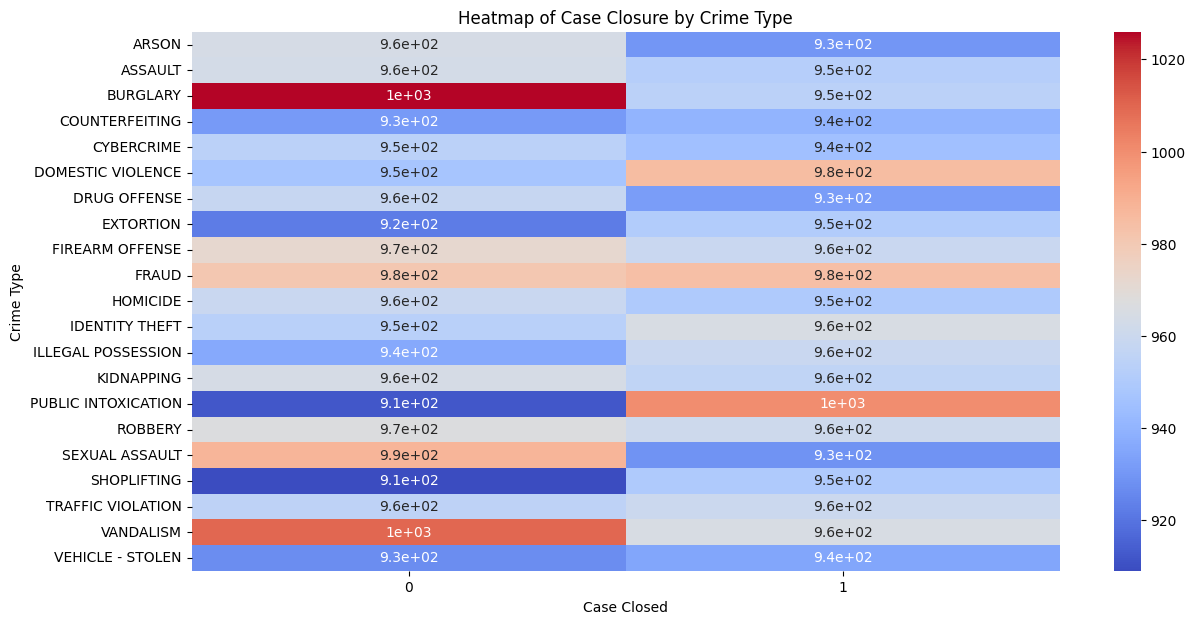

In [30]:
# Case Closure by Crime Type
closure_crime_type = data.groupby(['crime_description', 'case_closed'], observed=True).size().reset_index(name='count')

plt.figure(figsize=(14, 7))
sns.heatmap(closure_crime_type.pivot_table(index='crime_description', columns='case_closed', values='count', fill_value=0), cmap='coolwarm', annot=True)
plt.title('Heatmap of Case Closure by Crime Type')
plt.xlabel('Case Closed')
plt.ylabel('Crime Type')
plt.show()

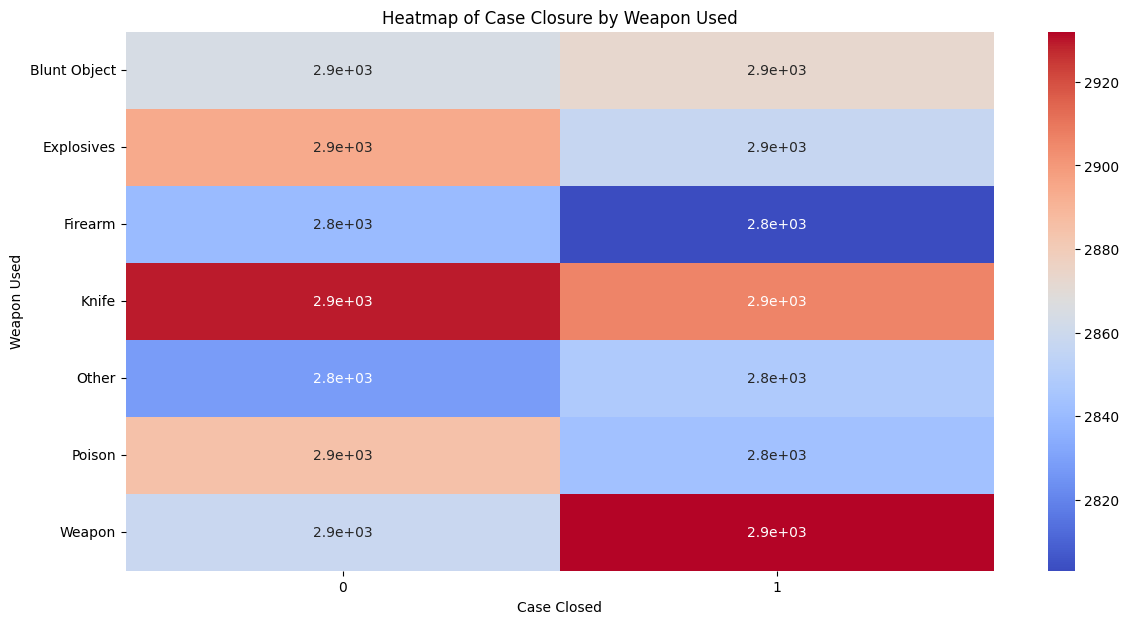

In [31]:
# Case Closure by Weapon Used
closure_weapon = data.groupby(['weapon_used', 'case_closed'], observed=True).size().reset_index(name='count')

plt.figure(figsize=(14, 7))
sns.heatmap(closure_weapon.pivot_table(index='weapon_used', columns='case_closed', values='count', fill_value=0), cmap='coolwarm', annot=True)
plt.title('Heatmap of Case Closure by Weapon Used')
plt.xlabel('Case Closed')
plt.ylabel('Weapon Used')
plt.show()

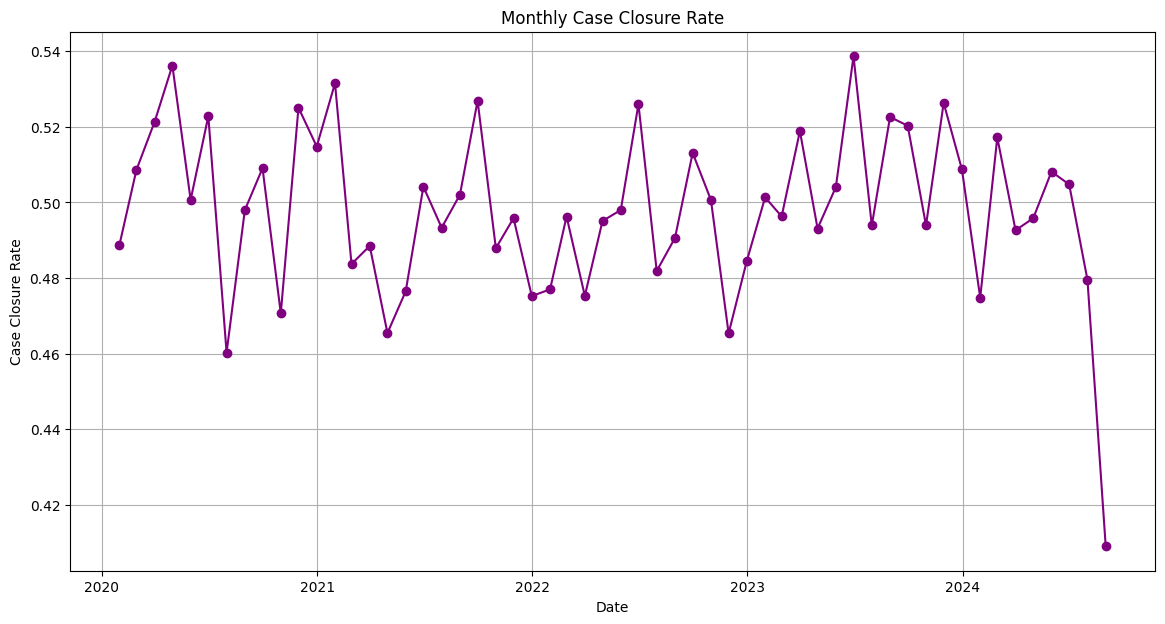

In [32]:
data_copy = data.copy()
# data['date_reported'] = pd.to_datetime(data['date_reported'], errors='coerce')

# Drop rows with NaT values in 'date_reported'
data_copy = data_copy.dropna(subset=['date_reported'])

# Set 'date_reported' as index
data_copy.set_index('date_reported', inplace=True)

# Resample and aggregate case closure data
monthly_case_closed = data_copy['case_closed'].resample('M').sum()
monthly_cases_reported = data_copy['case_closed'].resample('M').count()
closure_rate = monthly_case_closed / monthly_cases_reported

plt.figure(figsize=(14, 7))
plt.plot(closure_rate.index, closure_rate.values, marker='o', color='purple')
plt.title('Monthly Case Closure Rate')
plt.xlabel('Date')
plt.ylabel('Case Closure Rate')
plt.grid(True)
plt.show()

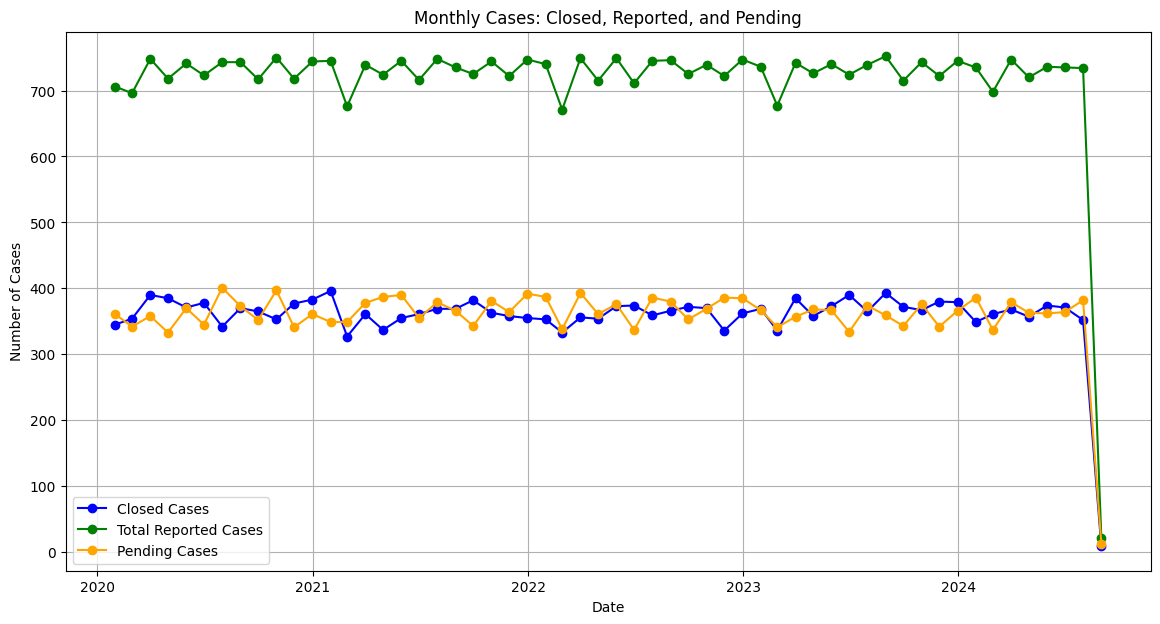

In [33]:
# Assuming 'data' is already loaded and available in your environment
# Create a copy of the dataset
data_copy = data.copy()

# Drop rows with NaN values in 'case_closed'
data_copy = data_copy.dropna(subset=['case_closed'])

# Ensure 'date_reported' column is datetime
data_copy['date_reported'] = pd.to_datetime(data_copy['date_reported'], errors='coerce')

# Drop rows with NaT values in 'date_reported'
data_copy = data_copy.dropna(subset=['date_reported'])

# Set 'date_reported' as index
data_copy.set_index('date_reported', inplace=True)

# Resample and aggregate case closure data
monthly_case_closed = data_copy['case_closed'].resample('M').sum()
monthly_cases_reported = data_copy.resample('M').size()  # Total reported cases

# Calculate pending (open) cases
monthly_pending_cases = monthly_cases_reported - monthly_case_closed

# Plotting
plt.figure(figsize=(14, 7))

# Plot Closed Cases
plt.plot(monthly_case_closed.index, monthly_case_closed.values, marker='o', color='blue', label='Closed Cases')

# Plot Total Reported Cases
plt.plot(monthly_cases_reported.index, monthly_cases_reported.values, marker='o', color='green', label='Total Reported Cases')

# Plot Pending Cases
plt.plot(monthly_pending_cases.index, monthly_pending_cases.values, marker='o', color='orange', label='Pending Cases')

plt.title('Monthly Cases: Closed, Reported, and Pending')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Assuming 'data' is already loaded and available in your environment
# Create a copy of the dataset if needed
data_copy = data.copy()

# Ensure 'crime_description' column is treated as categorical
data_copy['crime_description'] = data_copy['crime_description'].astype('category')

# Calculate crime frequency
crime_frequency = data_copy['crime_description'].value_counts()

# Print out the most common crimes
print(crime_frequency)

crime_description
BURGLARY               1980
VANDALISM              1975
FRAUD                  1965
DOMESTIC VIOLENCE      1932
FIREARM OFFENSE        1931
ROBBERY                1928
KIDNAPPING             1920
IDENTITY THEFT         1918
SEXUAL ASSAULT         1917
TRAFFIC VIOLATION      1915
ASSAULT                1915
PUBLIC INTOXICATION    1912
HOMICIDE               1909
CYBERCRIME             1899
ILLEGAL POSSESSION     1895
ARSON                  1894
DRUG OFFENSE           1890
EXTORTION              1873
COUNTERFEITING         1871
VEHICLE - STOLEN       1862
SHOPLIFTING            1859
Name: count, dtype: int64


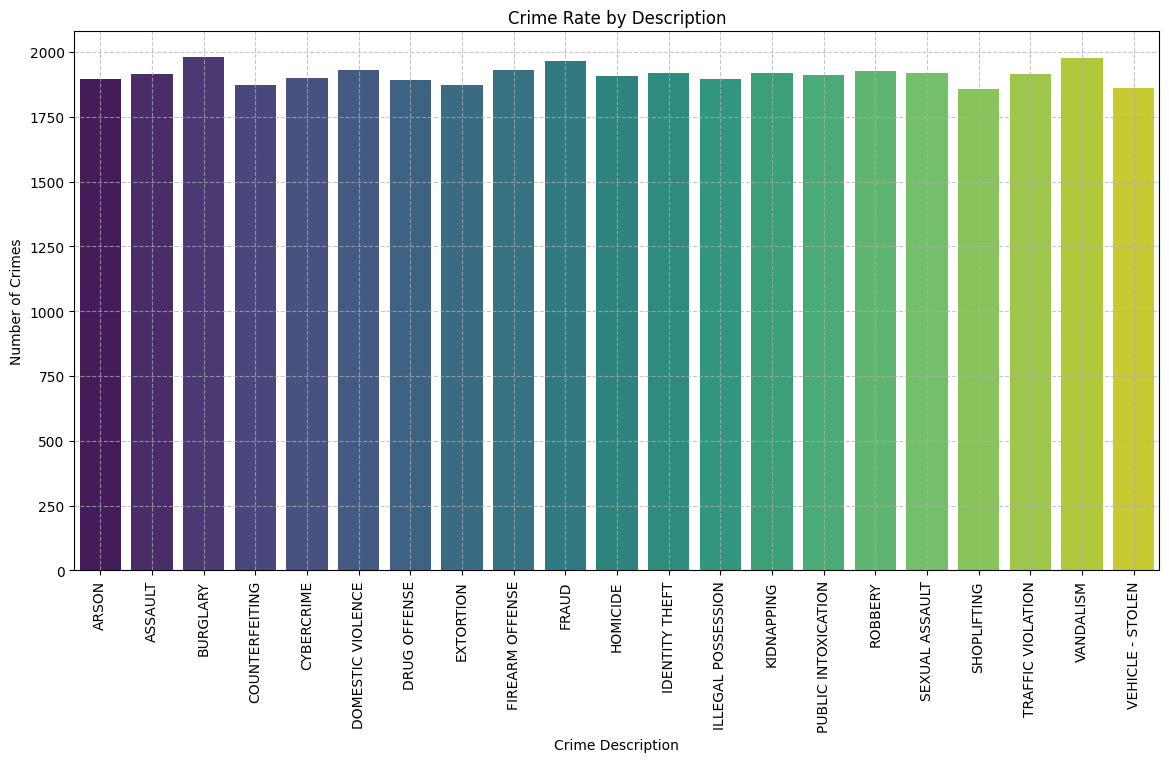

In [35]:
# Plot crime frequency distribution
plt.figure(figsize=(14, 7))
sns.barplot(x=crime_frequency.index, y=crime_frequency.values, palette='viridis')
plt.title('Crime Rate by Description')
plt.xlabel('Crime Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

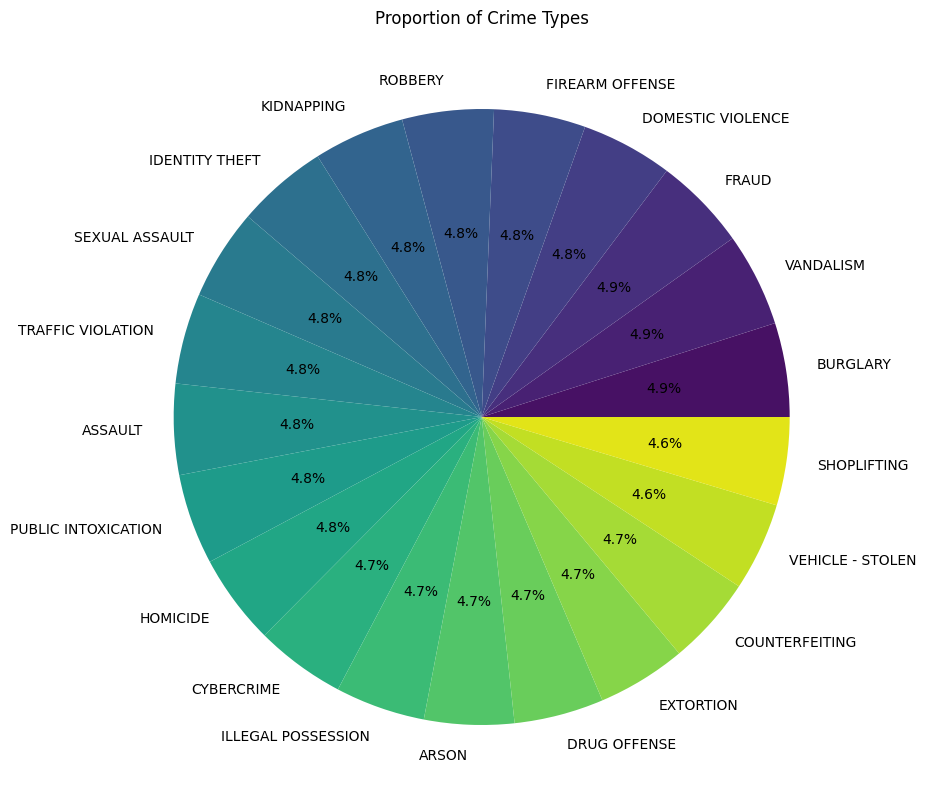

In [36]:
# Plot crime frequency as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(crime_frequency, labels=crime_frequency.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(crime_frequency)))
plt.title('Proportion of Crime Types')
plt.show()